In [1]:
import glob
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from termcolor import colored
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
import plotly.graph_objects as go
import matplotlib.patches as patches
from plotly.subplots import make_subplots
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
plt.rcParams['figure.dpi'] = 150
plt.rcParams["figure.figsize"] = (10,5)
colors=sns.color_palette('Set3')
sns.set(rc={
    'axes.facecolor':'#FFFFFF', 
    'figure.facecolor':'#FFFFFF',
    'font.sans-serif':'Arial',
    'font.family':'sans-serif'
})

In [2]:
result = pd.read_csv("/Users/kushtrivedi/Desktop/NYRA/SAR/Jul/Day27/race2.csv")
opt = pd.read_csv("/Users/kushtrivedi/Desktop/NYRA/SAR/Jul/Day27/opt_race_2.csv")

In [3]:
race = pd.merge(result,opt,on=["trakus_index"],how="inner",suffixes=('', '_remove'))
race.drop([i for i in race.columns if 'remove' in i],axis=1, inplace=True)
race.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
def opt_val(row):
    if round(row['latitude'],4) == round(row['average_lat'],4):
        val = 1 
    elif round(row['longitude'],4) == round(row['average_longi'],4):
        val = 1
    else:
        val = 0
    return val

race['is_opt'] = race.apply(opt_val, axis=1)

In [6]:
t_test_stat = race[["Speed (Mph)","Optimal Speed (Mph)","Acceleration","Optimal Acceleration","is_opt"]]

In [7]:
df_opt = t_test_stat[(t_test_stat['is_opt'] == 1) ][["Speed (Mph)","Optimal Speed (Mph)","Acceleration","Optimal Acceleration","is_opt"]]

df_not_opt = t_test_stat[(t_test_stat['is_opt'] == 0) ][["Speed (Mph)","Optimal Speed (Mph)","Acceleration","Optimal Acceleration","is_opt"]]


A. Optimum Latitude

* **Null Hypothesis**: the latitudes before and after taking an optimum path is the same.

* **Alternative Hypothesis**: the latitudes after taking an optimum path (optimum latitude) is better than current (latitude).

B. Not Optimum Latitude

- **Null Hypothesis**: among jockeys who didn’t take an optimum latitude, the latitudes of the current path is the same as the optimum path.

- **Alternative Hypothesis**: among jockeys who didn't take an optimum latitude, the latitudes of the optimum path is better than the current path.


In [8]:
# test_statistic, p_value = ttest_rel(df_opt['latitude'], df_opt['average_lat'],alternative='less')

# print(p_value)

# if p_value < 0.05:
#     print("\nWe Reject Null Hypothesis")
# else:
#     print("\nWe Accept Alternate Hypothesis")
    
    
# #############


# test_statistic, p_value = ttest_rel(df_not_opt['latitude'], df_not_opt['average_lat'],alternative='less')

# print(p_value)

# if p_value < 0.05:
#     print("\nWe Reject Null Hypothesis")
# else:
#     print("\nWe Accept Alternate Hypothesis")
    

A. Optimum Longitude

* **Null Hypothesis**: the longitudes current and after taking an optimum path is the same.

* **Alternative Hypothesis**: the longitudes after taking an optimum path (optimum longitude) is better than current (longitude).

B. Not Optimum Longitude

- **Null Hypothesis**: among jockeys who didn’t take an optimum longitude, the longitudes of the current path is the same as the optimum path.

- **Alternative Hypothesis**: among jockeys who didn't take an optimum longitude, the longitudes of the optimum path is better than the current path.
    
    

In [9]:
# test_statistic, p_value = ttest_rel(df_opt['longitude'], df_opt['average_longi'],alternative='less')

# print(p_value)

# if p_value < 0.05:
#     print("\nWe Reject Null Hypothesis")
# else:
#     print("\nWe Accept Alternate Hypothesis")
    
    
    
# #############



# test_statistic, p_value = ttest_rel(df_not_opt['longitude'], df_not_opt['average_longi'],alternative='less')

# print(p_value)

# if p_value < 0.05:
#     print("\nWe Reject Null Hypothesis")
# else:
#     print("\nWe Accept Alternate Hypothesis")
    

A. Not on a Optimum Speed

- **Null Hypothesis**: among jockeys who wasn't on an optimum speed, the speed of the current path is the same as the optimum path.

- **Alternative Hypothesis**: among jockeys who was on an optimum speed, the speed of the optimum path is better than the current path.

B. Optimum Speed

* **Null Hypothesis**: the average speed before and after taking an optimum path is the same.

* **Alternative Hypothesis**: the average speed after taking an optimum path (Optimum Speed (Mph)) is better than before (Speed (Mph)).



In [26]:
test_statistic, p_value = ttest_rel(df_not_opt['Speed (Mph)'], df_not_opt['Optimal Speed (Mph)'],alternative='less')

if p_value < 0.05:
    print(
        colored("Two Releated Sample Test","cyan",attrs=['bold']),"for", 
        colored("Not Taking an Optimum Path","yellow",attrs=['bold']), "resulted as \033[1m{:.4f}\033[0m and".format(p_value), 
        colored("p_value < .05","blue",attrs=['bold']),"for", 
        colored("Speed (Mph)","green",attrs=['bold']), "and", 
        colored("Optimal Speed (Mph)","green",attrs=['bold']), "which indicates that ", 
        colored("     Null Hypothesis (H0) is rejected. \n\n\n","red",attrs=['bold'])
    )
else:
    print(
        colored("Two Releated Sample Test","cyan",attrs=['bold']),"for",
        colored("Not Taking an Optimum Path","yellow",attrs=['bold']),"resulted as \033[1m{:.4f}\033[0m  and".format(p_value),
        colored("p_value > .05","blue",attrs=['bold']),"for",
        colored("Speed (Mph)","green",attrs=['bold']), "and", 
        colored("Optimal Speed (Mph)","green",attrs=['bold']), "which indicates that ", 
        colored("    Null Hypothesis (H0) can NOT be rejected in favour of Alternative Hypothesis (H1)\n\n\n","red",attrs=['bold'])
    )

Two Releated Sample Test for Not Taking an Optimum Path resulted as 0.0000 and p_value < .05 for Speed (Mph) and Optimal Speed (Mph) which indicates that       Null Hypothesis (H0) is rejected. 





In [24]:
test_statistic, p_value = ttest_rel(df_opt['Speed (Mph)'], df_opt['Optimal Speed (Mph)'],alternative='less')

if p_value < 0.05:
    print(
        colored("Two Releated Sample Test","cyan",attrs=['bold']),"for", 
        colored("Taking an Optimum Path","yellow",attrs=['bold']), "resulted as \033[1m{:.4f}\033[0m and".format(p_value), 
        colored("p_value < .05","blue",attrs=['bold']),"for", 
        colored("Speed (Mph)","green",attrs=['bold']), "and", 
        colored("Optimal Speed (Mph)","green",attrs=['bold']), "which indicates that ", 
        colored("         Null Hypothesis (H0) is rejected.","red",attrs=['bold'])
    )
else:
    print(
        colored("Two Releated Sample Test","cyan",attrs=['bold']),"for",
        colored("Taking an Optimum Path","yellow",attrs=['bold']),"resulted as \033[1m{:.4f}\033[0m  and".format(p_value),
        colored("p_value > .05","blue",attrs=['bold']),"for",
        colored("Speed (Mph)","green",attrs=['bold']), "and", 
        colored("Optimal Speed (Mph)","green",attrs=['bold']), "which indicates that ", 
        colored("        Null Hypothesis (H0) can NOT be rejected in favour of Alternative Hypothesis (H1)\n\n\n","red",attrs=['bold'])
    )

Two Releated Sample Test for Taking an Optimum Path resulted as 0.7318  and p_value > .05 for Speed (Mph) and Optimal Speed (Mph) which indicates that          Null Hypothesis (H0) can NOT be rejected in favour of Alternative Hypothesis (H1)





A. Not on a Optimal Acceleration

- **Null Hypothesis**: among jockeys who didn’t applied an optimal acceleration, the acceleration applied on the current path is the same of the optimum path.

- **Alternative Hypothesis**: among jockeys who didn't applied an optimal acceleration, the acceleration applied on the optimum path is better than the current path.

B. Optimum Acceleration

* **Null Hypothesis**: the average acceleration applied before and after taking an optimum path is the same.

* **Alternative Hypothesis**: the average acceleration on an optimum path (Optimal Acceleration) is better than that of current path (Acceleration)).


In [27]:
test_statistic, p_value = ttest_rel(df_not_opt['Acceleration'], df_not_opt['Optimal Acceleration'],alternative='less')


if p_value < 0.05:
    print(
        colored("Two Releated Sample Test","cyan",attrs=['bold']),"for", 
        colored("Not Taking an Optimum Path","yellow",attrs=['bold']), "resulted as \033[1m{:.4f}\033[0m and".format(p_value), 
        colored("p_value < .05","blue",attrs=['bold']),"for", 
        colored("Acceleration","green",attrs=['bold']), "and", 
        colored("Optimal Acceleration","green",attrs=['bold']), "which indicates that ", 
        colored("     Null Hypothesis (H0) is rejected.","red",attrs=['bold'])
    )
else:
    print(
        colored("Two Releated Sample Test","cyan",attrs=['bold']),"for",
        colored("Not Taking an Optimum Path","yellow",attrs=['bold']),"resulted as \033[1m{:.4f}\033[0m  and".format(p_value),
        colored("p_value > .05","blue",attrs=['bold']),"for",
        colored("Acceleration","green",attrs=['bold']), "and", 
        colored("Optimal Acceleration","green",attrs=['bold']), "which indicates that ", 
        colored("    Null Hypothesis (H0) can NOT be rejected in favour of Alternative Hypothesis (H1)\n\n\n","red",attrs=['bold'])
    )

Two Releated Sample Test for Not Taking an Optimum Path resulted as 0.4623  and p_value > .05 for Acceleration and Optimal Acceleration which indicates that      Null Hypothesis (H0) can NOT be rejected in favour of Alternative Hypothesis (H1)





In [30]:
test_statistic, p_value = ttest_rel(df_opt['Acceleration'], df_opt['Optimal Acceleration'],alternative='less')


if p_value < 0.05:
    print(
        colored("Two Releated Sample Test","cyan",attrs=['bold']),"for", 
        colored("Taking an Optimum Path","yellow",attrs=['bold']), "resulted as \033[1m{:.4f}\033[0m and".format(p_value), 
        colored("p_value < .05","blue",attrs=['bold']),"for", 
        colored("Acceleration","green",attrs=['bold']), "and", 
        colored("Optimal Acceleration","green",attrs=['bold']), "which indicates that ", 
        colored("         Null Hypothesis (H0) is rejected.","red",attrs=['bold'])
    )
else:
    print(
        colored("Two Releated Sample Test","cyan",attrs=['bold']),"for",
        colored("Taking an Optimum Path","yellow",attrs=['bold']),"resulted as \033[1m{:.4f}\033[0m  and".format(p_value),
        colored("p_value > .05","blue",attrs=['bold']),"for",
        colored("Acceleration","green",attrs=['bold']), "and", 
        colored("Optimal Acceleration","green",attrs=['bold']), "which indicates that ", 
        colored("        Null Hypothesis (H0) can NOT be rejected in favour of Alternative Hypothesis (H1)\n\n\n","red",attrs=['bold'])
    )

Two Releated Sample Test for Taking an Optimum Path resulted as 0.5325  and p_value > .05 for Acceleration and Optimal Acceleration which indicates that          Null Hypothesis (H0) can NOT be rejected in favour of Alternative Hypothesis (H1)





In [14]:
javier_castellano = race[(race.jockey == 'Javier Castellano')]
dylan_davis = race[(race.jockey == 'Dylan Davis')]
tyler_gaffalione = race[(race.jockey == 'Tyler Gaffalione')]
junior_alvarado = race[(race.jockey == 'Junior Alvarado')]
jose_ortiz = race[(race.jockey == 'Jose L. Ortiz')]
joel_rosario = race[(race.jockey == 'Joel Rosario')]
manuel_franco = race[(race.jockey == 'Manuel Franco')]

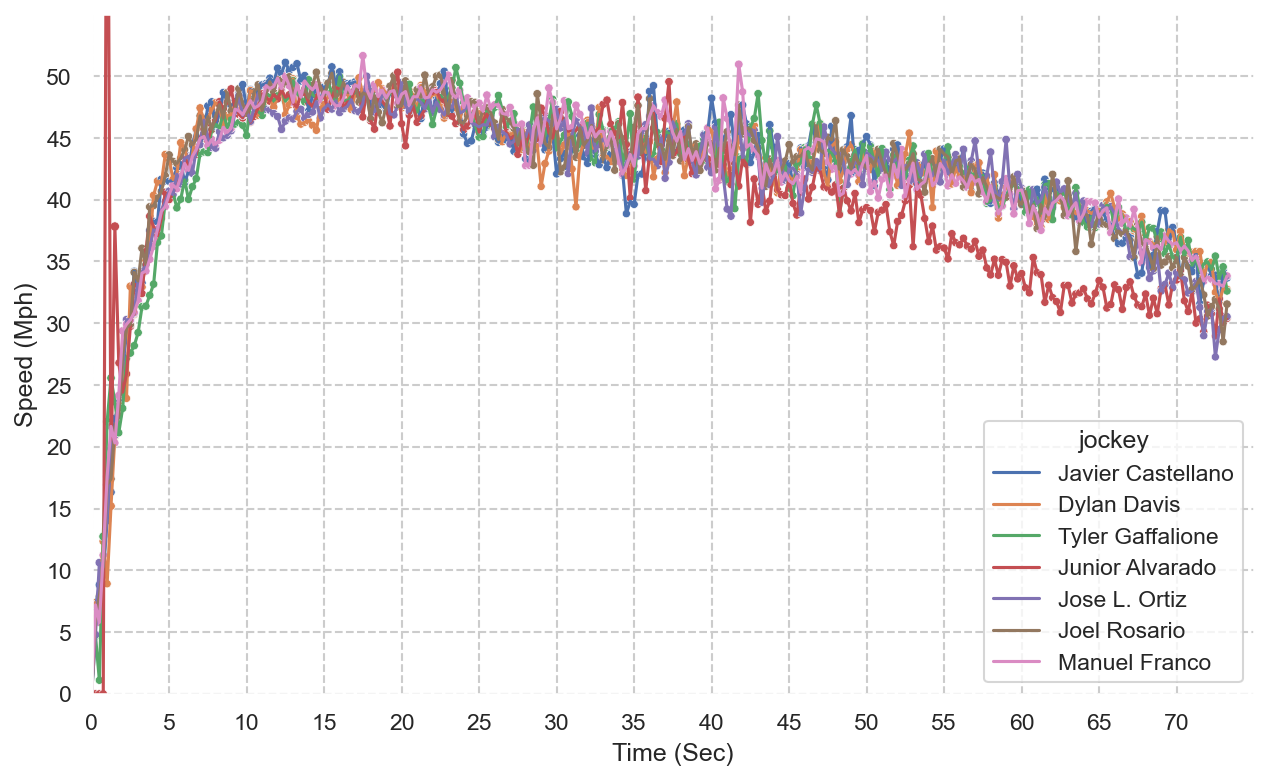

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.lineplot(y=race['Speed (Mph)'],x= race['Time (Sec)'],hue=race['jockey'])
# ax = sns.regplot(y=race['Speed (Mph)'],x= race['Time (Sec)'],scatter=True, truncate=False)
ax = sns.scatterplot(data=race, x= race['Time (Sec)'], y=race['Speed (Mph)'],hue=race['jockey'], size="Acceleration", legend=False, sizes=(5, 30))
# Set axis ranges; by default this will put major ticks every 25.
plt.yticks(np.arange(0, 55, step=5))
plt.xticks(np.arange(0, 75, step=5))

ax.set_xlim(0, 75)
ax.set_ylim(0, 55)

ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

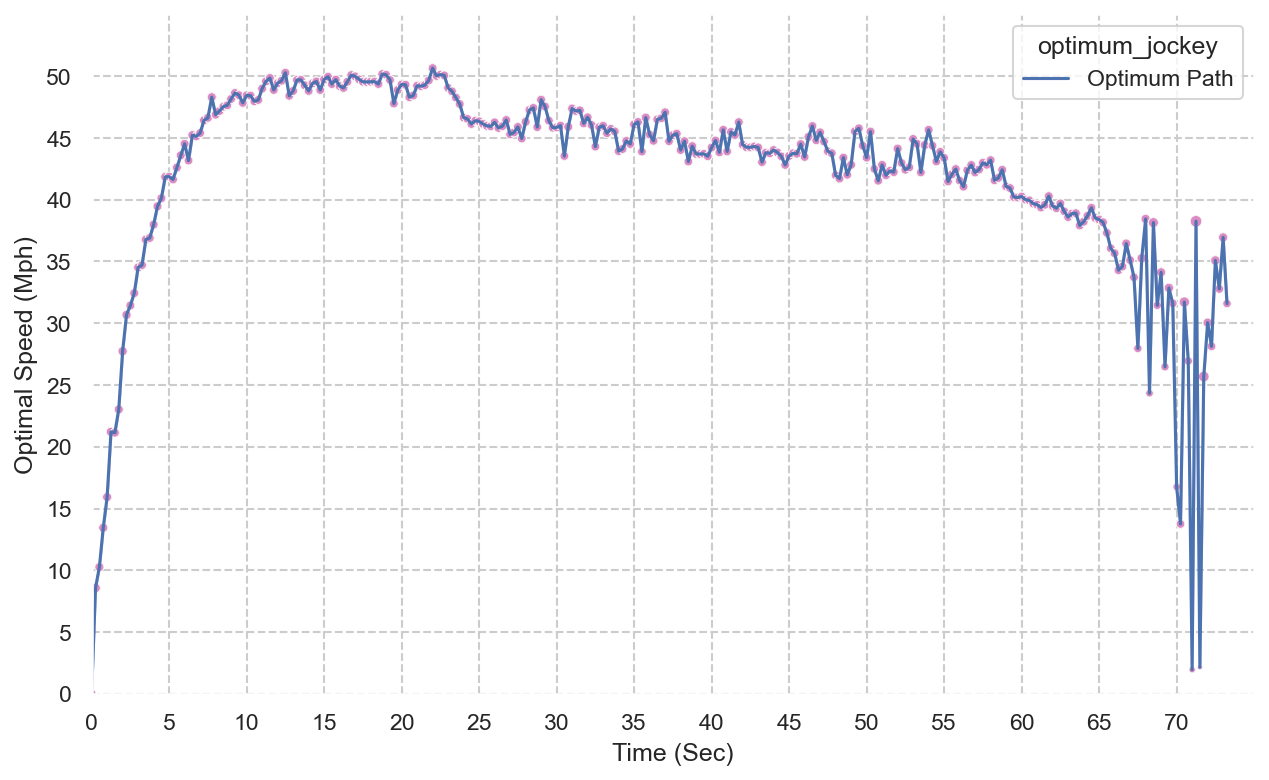

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.lineplot(y=race['Optimal Speed (Mph)'],x= race['Time (Sec)'],hue=race['optimum_jockey'])
# ax = sns.regplot(y=race['Speed (Mph)'],x= race['Time (Sec)'],scatter=True, truncate=False)
ax = sns.scatterplot(data=race, x= race['Time (Sec)'], y=race['Optimal Speed (Mph)'],hue=race['jockey'], size="Optimal Acceleration", legend=False, sizes=(5, 30))
# Set axis ranges; by default this will put major ticks every 25.
plt.yticks(np.arange(0, 55, step=5))
plt.xticks(np.arange(0, 75, step=5))

ax.set_xlim(0, 75)
ax.set_ylim(0, 55)

ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

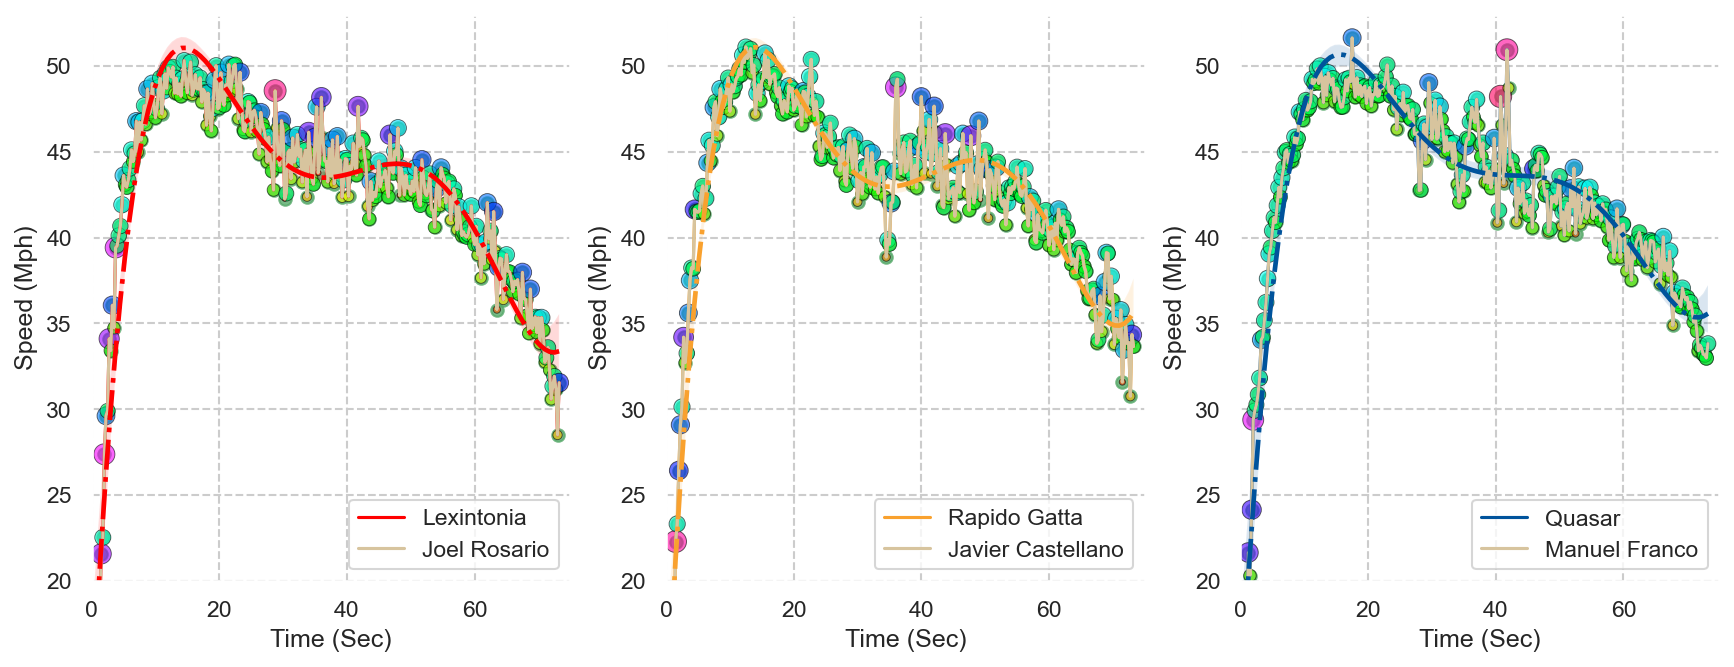

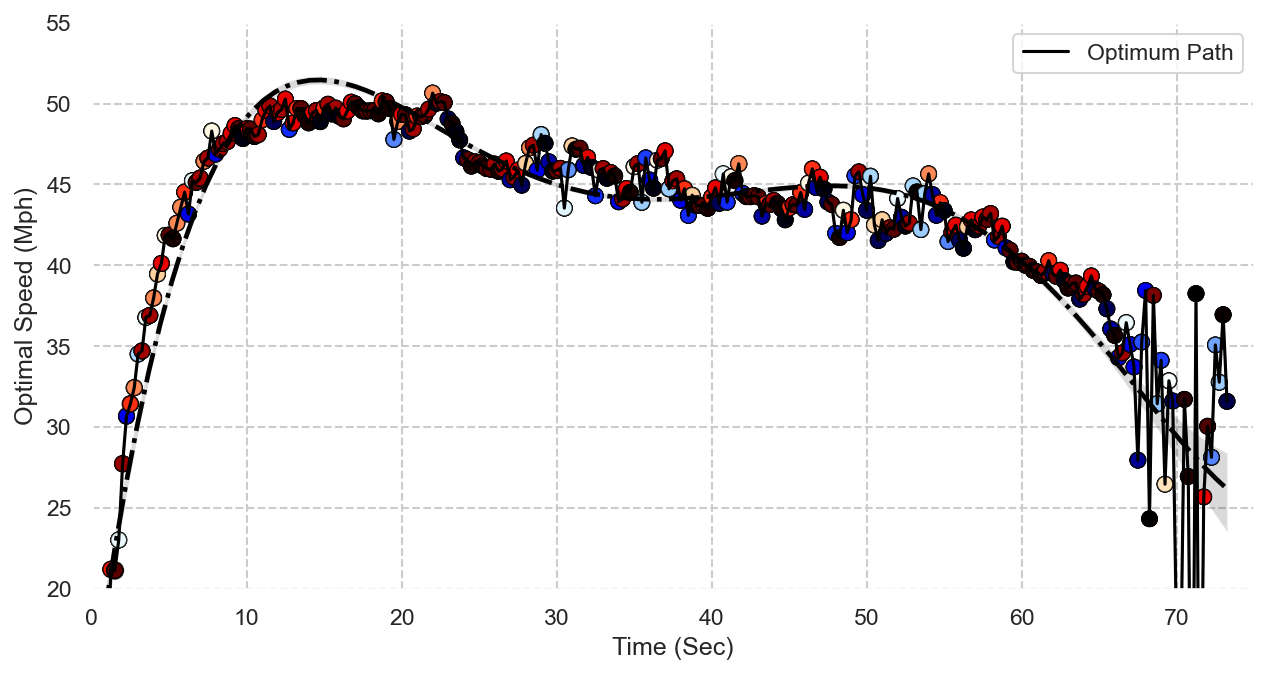

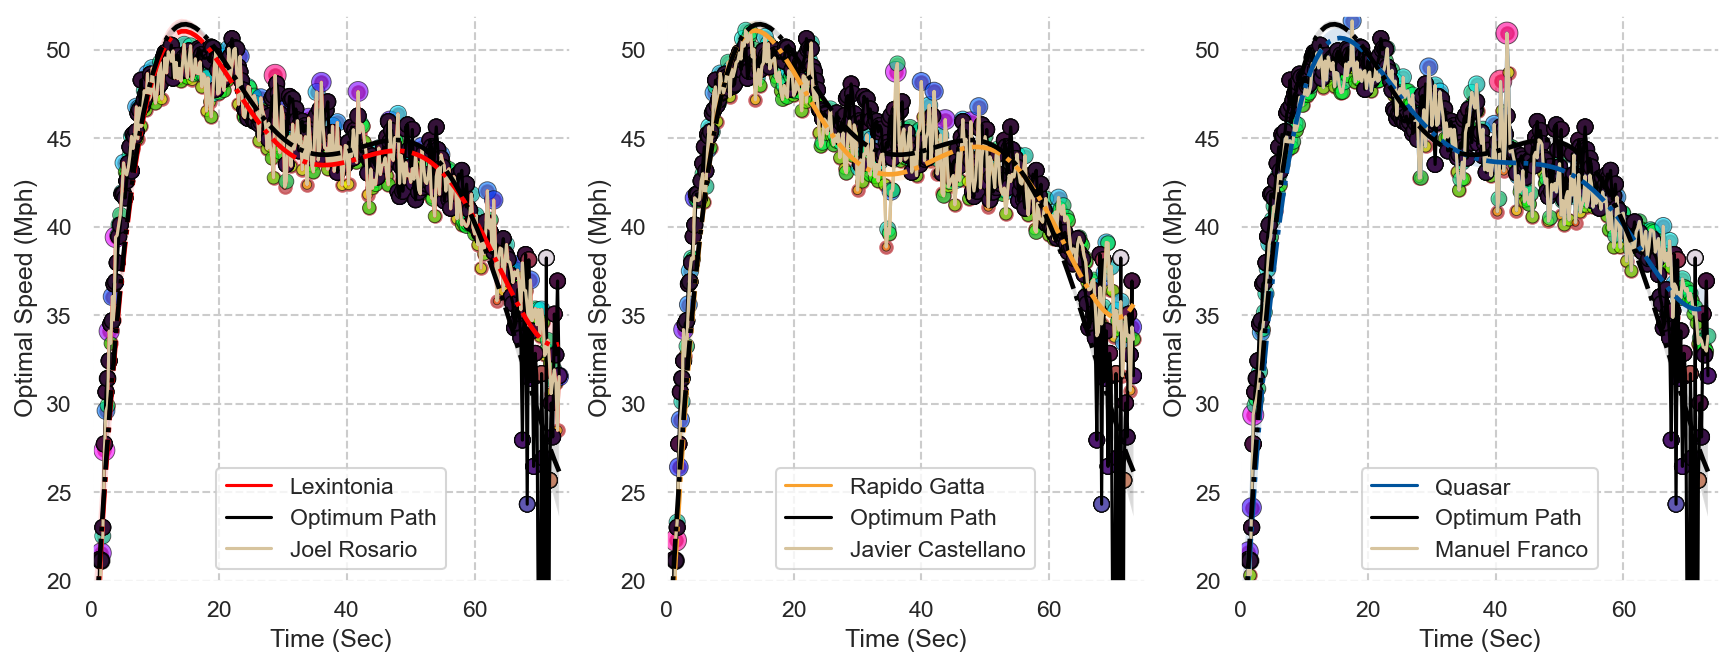

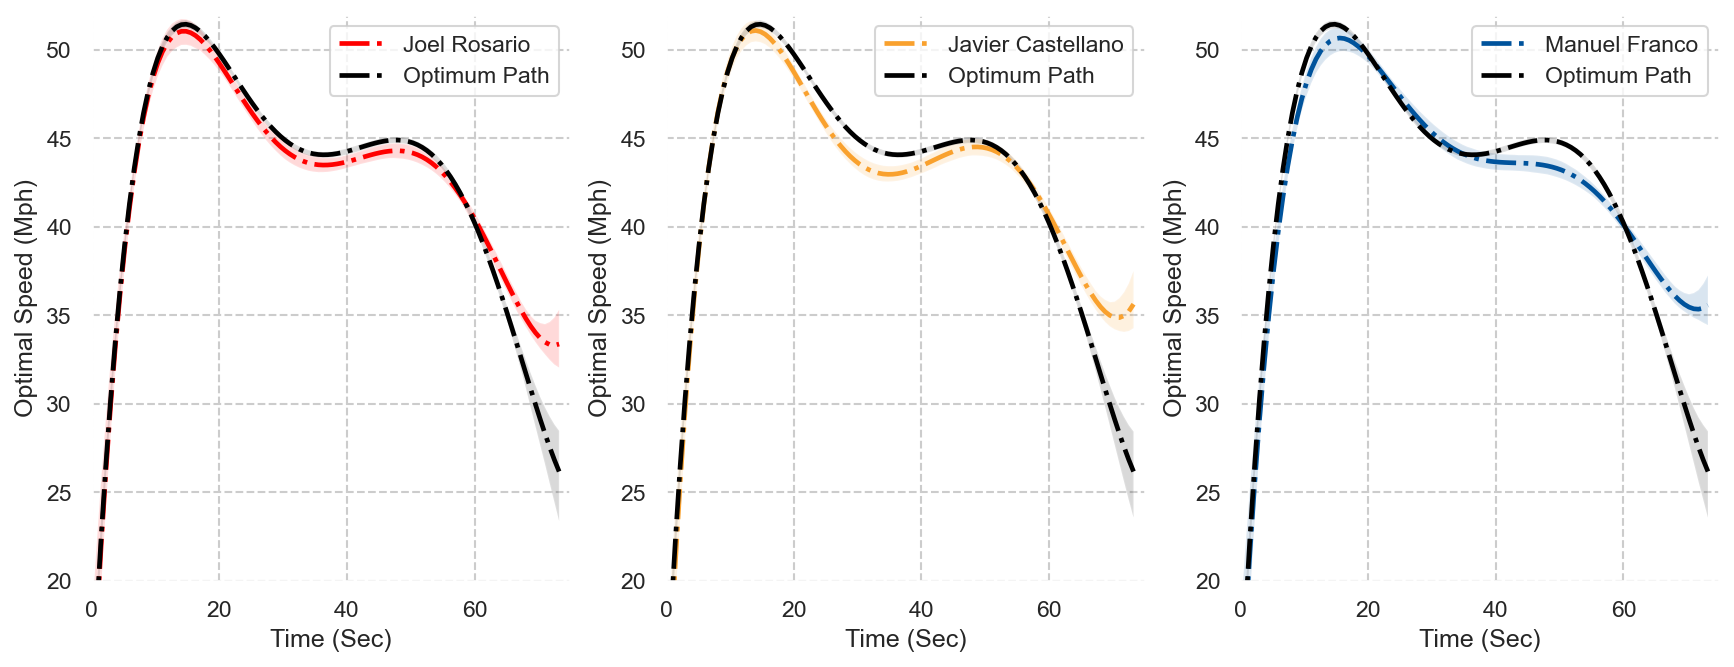

In [17]:
# ax = sns.regplot(data=tyler_gaffalione,y=tyler_gaffalione['latitude'],x=tyler_gaffalione['longitude'],order=10, line_kws={'color':'#00539CFF','linestyle':'-.'})
fig, ax = plt.subplots(1,3,figsize=(14, 5))
ax[0] = sns.lineplot(y=joel_rosario['Speed (Mph)'],x= joel_rosario['Time (Sec)'],hue=joel_rosario['horse_name'],palette=['red'],ax=ax[0])
ax[0] = sns.lineplot(y=joel_rosario['Speed (Mph)'],x= joel_rosario['Time (Sec)'],hue=joel_rosario['jockey'],palette=['#D7C49EFF'],ax=ax[0])
ax[0] = sns.regplot(y=joel_rosario['Speed (Mph)'],x= joel_rosario['Time (Sec)'], order=5,line_kws={'color':'red','linestyle':'-.'},ax=ax[0])
ax[0] = sns.scatterplot(data=joel_rosario, x= joel_rosario['Time (Sec)'], y=joel_rosario['Speed (Mph)'],hue=joel_rosario['Acceleration'],palette='hsv',alpha=0.6, ec='black', size="Acceleration", sizes=(5,120),legend=None,ax=ax[0])
ax[0].set_xlim(0, 75)
ax[0].set_ylim(20, 53)
ax[0].grid(which='major', color='#CCCCCC', linestyle='--')
ax[0].grid(which='minor', color='#CCCCCC', linestyle=':')
ax[0].legend(loc='lower right')

ax[1] = sns.lineplot(y=javier_castellano['Speed (Mph)'],x= javier_castellano['Time (Sec)'],hue=javier_castellano['horse_name'],palette=['#F9A12EFF'],ax=ax[1])
ax[1] = sns.lineplot(y=javier_castellano['Speed (Mph)'],x= javier_castellano['Time (Sec)'],hue=javier_castellano['jockey'],palette=['#D7C49EFF'],ax=ax[1])
ax[1] = sns.regplot(y=javier_castellano['Speed (Mph)'],x= javier_castellano['Time (Sec)'], order=5,line_kws={'color':'#F9A12EFF','linestyle':'-.'},ax=ax[1])
ax[1] = sns.scatterplot(data=javier_castellano, x= javier_castellano['Time (Sec)'], y=javier_castellano['Speed (Mph)'],hue=javier_castellano['Acceleration'],palette='hsv',alpha=0.6, ec='black', size="Acceleration", sizes=(5,120),legend=None,ax=ax[1])
ax[1].set_xlim(0, 75)
ax[1].set_ylim(20, 53)
ax[1].grid(which='major', color='#CCCCCC', linestyle='--')
ax[1].grid(which='minor', color='#CCCCCC', linestyle=':')
ax[1].legend(loc='lower right')

ax[2] = sns.lineplot(y=manuel_franco['Speed (Mph)'],x= manuel_franco['Time (Sec)'],hue=manuel_franco['horse_name'],palette=['#00539CFF'],ax=ax[2])
ax[2] = sns.lineplot(y=manuel_franco['Speed (Mph)'],x= manuel_franco['Time (Sec)'],hue=manuel_franco['jockey'],palette=['#D7C49EFF'],ax=ax[2])
ax[2] = sns.regplot(data=manuel_franco,y=manuel_franco['Speed (Mph)'],x= manuel_franco['Time (Sec)'], order=5,line_kws={'color':'#00539CFF','linestyle':'-.'},ax=ax[2])
ax[2] = sns.scatterplot(data=manuel_franco, x= manuel_franco['Time (Sec)'], y=manuel_franco['Speed (Mph)'],hue=manuel_franco['Acceleration'],palette='hsv',alpha=0.6, ec='black', size="Acceleration", sizes=(5,120),legend=None,ax=ax[2])
ax[2].set_xlim(0, 75)
ax[2].set_ylim(20, 53)
ax[2].grid(which='major', color='#CCCCCC', linestyle='--')
ax[2].grid(which='minor', color='#CCCCCC', linestyle=':')
ax[2].legend(loc='lower right')
plt.savefig('joel_vs_jaiver_vs_manuel.png', bbox_inches='tight')
plt.show()
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.lineplot(y=race['Optimal Speed (Mph)'],x= race['Time (Sec)'],hue=race['optimum_jockey'],palette=['black'])
ax = sns.regplot(y=race['Optimal Speed (Mph)'],x= race['Time (Sec)'], order=5,line_kws={'color':'black','linestyle':'-.'})
ax = sns.scatterplot(data=race, x= race['Time (Sec)'], y=race['Optimal Speed (Mph)'],hue=race['Optimal Acceleration'],palette='flag',alpha=0.6, ec='black', size="Acceleration", sizes=(5,120),legend=None)
ax.set_xlim(0, 75)
ax.set_ylim(20, 55)
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.savefig('optimum_six_on_dirt_sar.png', bbox_inches='tight')
plt.legend(loc='upper right')
plt.show()

fig, ax = plt.subplots(1,3,figsize=(14, 5))
ax[0] = sns.lineplot(y=joel_rosario['Speed (Mph)'],x= joel_rosario['Time (Sec)'],hue=joel_rosario['horse_name'],palette=['red'],ax=ax[0])
ax[0] = sns.lineplot(y=race['Optimal Speed (Mph)'],x= race['Time (Sec)'],hue=race['optimum_jockey'],palette=['black'],ax=ax[0])
ax[0] = sns.lineplot(y=joel_rosario['Speed (Mph)'],x= joel_rosario['Time (Sec)'],hue=joel_rosario['jockey'],palette=['#D7C49EFF'],ax=ax[0])
ax[0] = sns.regplot(y=joel_rosario['Speed (Mph)'],x= joel_rosario['Time (Sec)'], order=5,line_kws={'color':'red','linestyle':'-.'},ax=ax[0])
ax[0] = sns.regplot(y=race['Optimal Speed (Mph)'],x= race['Time (Sec)'], order=5,line_kws={'color':'black','linestyle':'-.'},ax=ax[0])
ax[0] = sns.scatterplot(data=joel_rosario, x= joel_rosario['Time (Sec)'], y=joel_rosario['Speed (Mph)'],hue=joel_rosario['Acceleration'],palette='hsv',alpha=0.6, ec='black', size="Acceleration", sizes=(5,120),legend=None,ax=ax[0])
ax[0] = sns.scatterplot(data=race, x= race['Time (Sec)'], y=race['Optimal Speed (Mph)'],hue=race['Optimal Acceleration'],palette='twilight',alpha=0.6, ec='black', size="Acceleration", sizes=(5,120),legend=None,ax=ax[0])
ax[0].set_xlim(0, 75)
ax[0].set_ylim(20, 52) 
ax[0].grid(which='major', color='#CCCCCC', linestyle='--')
ax[0].grid(which='minor', color='#CCCCCC', linestyle=':')
ax[0].legend(loc='best')

ax[1] = sns.lineplot(y=javier_castellano['Speed (Mph)'],x= javier_castellano['Time (Sec)'],hue=javier_castellano['horse_name'],palette=['#F9A12EFF'],ax=ax[1])
ax[1] = sns.lineplot(y=race['Optimal Speed (Mph)'],x= race['Time (Sec)'],hue=race['optimum_jockey'],palette=['black'],ax=ax[1])
ax[1] = sns.lineplot(y=javier_castellano['Speed (Mph)'],x= javier_castellano['Time (Sec)'],hue=javier_castellano['jockey'],palette=['#D7C49EFF'],ax=ax[1])
ax[1] = sns.regplot(y=javier_castellano['Speed (Mph)'],x= javier_castellano['Time (Sec)'], order=5,line_kws={'color':'#F9A12EFF','linestyle':'-.'},ax=ax[1])
ax[1] = sns.regplot(y=race['Optimal Speed (Mph)'],x= race['Time (Sec)'], order=5,line_kws={'color':'black','linestyle':'-.'},ax=ax[1])
ax[1] = sns.scatterplot(data=javier_castellano, x= javier_castellano['Time (Sec)'], y=javier_castellano['Speed (Mph)'],hue=javier_castellano['Acceleration'],palette='hsv',alpha=0.6, ec='black', size="Acceleration", sizes=(5,120),legend=None,ax=ax[1])
ax[1] = sns.scatterplot(data=race, x= race['Time (Sec)'], y=race['Optimal Speed (Mph)'],hue=race['Optimal Acceleration'],palette='twilight',alpha=0.6, ec='black', size="Acceleration", sizes=(5,120),legend=None,ax=ax[1])
ax[1].set_xlim(0, 75)
ax[1].set_ylim(20, 52) 
ax[1].grid(which='major', color='#CCCCCC', linestyle='--')
ax[1].grid(which='minor', color='#CCCCCC', linestyle=':')
ax[1].legend(loc='best')

ax[2] = sns.lineplot(y=manuel_franco['Speed (Mph)'],x= manuel_franco['Time (Sec)'],hue=manuel_franco['horse_name'],palette=['#00539CFF'],ax=ax[2])
ax[2] = sns.lineplot(y=race['Optimal Speed (Mph)'],x= race['Time (Sec)'],hue=race['optimum_jockey'],palette=['black'],ax=ax[2])
ax[2] = sns.lineplot(y=manuel_franco['Speed (Mph)'],x= manuel_franco['Time (Sec)'],hue=manuel_franco['jockey'],palette=['#D7C49EFF'],ax=ax[2])
ax[2] = sns.regplot(y=manuel_franco['Speed (Mph)'],x= manuel_franco['Time (Sec)'], order=5,line_kws={'color':'#00539CFF','linestyle':'-.'},ax=ax[2])
ax[2] = sns.regplot(y=race['Optimal Speed (Mph)'],x= race['Time (Sec)'], order=5,line_kws={'color':'black','linestyle':'-.'},ax=ax[2])
ax[2] = sns.scatterplot(data=manuel_franco, x= manuel_franco['Time (Sec)'], y=manuel_franco['Speed (Mph)'],hue=manuel_franco['Acceleration'],palette='hsv',alpha=0.6, ec='black', size="Acceleration", sizes=(5,122),legend=None,ax=ax[2])
ax[2] = sns.scatterplot(data=race, x= race['Time (Sec)'], y=race['Optimal Speed (Mph)'],hue=race['Optimal Acceleration'],palette='twilight',alpha=0.6, ec='black', size="Acceleration", sizes=(5,122),legend=None,ax=ax[2])
ax[2].set_xlim(0, 75)
ax[2].set_ylim(20, 52) 
ax[2].grid(which='major', color='#CCCCCC', linestyle='--')
ax[2].grid(which='minor', color='#CCCCCC', linestyle=':')
ax[2].legend(loc='best')
plt.savefig('optimum_six_on_dirt_sar_mix_all.png', bbox_inches='tight')
plt.show()
fig, ax = plt.subplots(1,3,figsize=(14, 5))
ax[0] = sns.regplot(y=joel_rosario['Speed (Mph)'],x= joel_rosario['Time (Sec)'], order=5,line_kws={'color':'red','linestyle':'-.'},ax=ax[0],scatter=False,label="Joel Rosario")
ax[0] = sns.regplot(y=race['Optimal Speed (Mph)'],x= race['Time (Sec)'], order=5,line_kws={'color':'black','linestyle':'-.'},ax=ax[0],scatter=False,label="Optimum Path")
ax[0].set_xlim(0, 75)
ax[0].set_ylim(20, 52) 
ax[0].grid(which='major', color='#CCCCCC', linestyle='--')
ax[0].grid(which='minor', color='#CCCCCC', linestyle=':')

ax[1] = sns.regplot(y=javier_castellano['Speed (Mph)'],x= javier_castellano['Time (Sec)'], order=5,line_kws={'color':'#F9A12EFF','linestyle':'-.'},ax=ax[1],scatter=False,label="Javier Castellano")
ax[1] = sns.regplot(y=race['Optimal Speed (Mph)'],x= race['Time (Sec)'], order=5,line_kws={'color':'black','linestyle':'-.'},ax=ax[1],scatter=False,label="Optimum Path")
ax[1].set_xlim(0, 75)
ax[1].set_ylim(20, 52) 
ax[1].grid(which='major', color='#CCCCCC', linestyle='--')
ax[1].grid(which='minor', color='#CCCCCC', linestyle=':')

ax[2] = sns.regplot(y=manuel_franco['Speed (Mph)'],x= manuel_franco['Time (Sec)'], order=5,line_kws={'color':'#00539CFF','linestyle':'-.'},ax=ax[2],scatter=False,label="Manuel Franco")
ax[2] = sns.regplot(y=race['Optimal Speed (Mph)'],x= race['Time (Sec)'], order=5,line_kws={'color':'black','linestyle':'-.'},ax=ax[2],scatter=False,label="Optimum Path")
ax[2].set_xlim(0, 75)
ax[2].set_ylim(20, 52) 
ax[2].grid(which='major', color='#CCCCCC', linestyle='--')
ax[2].grid(which='minor', color='#CCCCCC', linestyle=':')
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
ax[2].legend(loc='upper right')
plt.savefig('joc_with_optimum_reg.png', bbox_inches='tight')
plt.show()

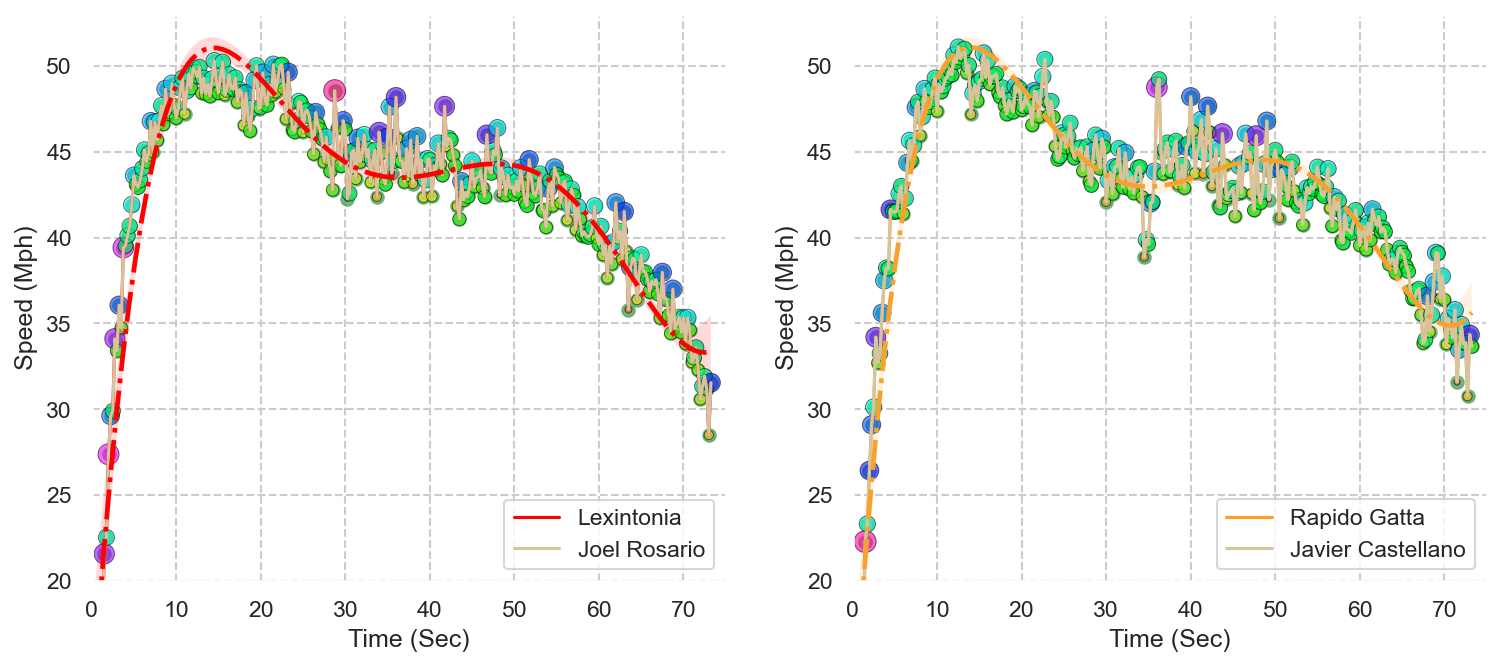

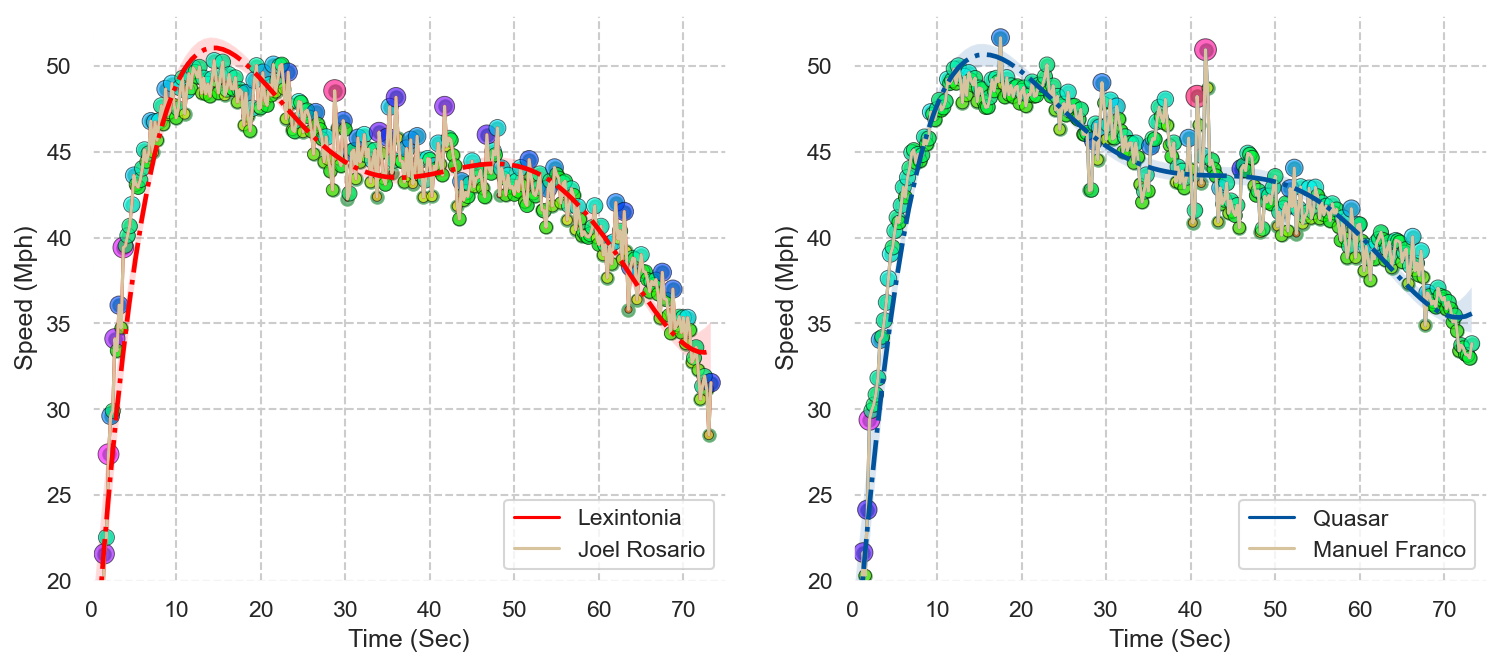

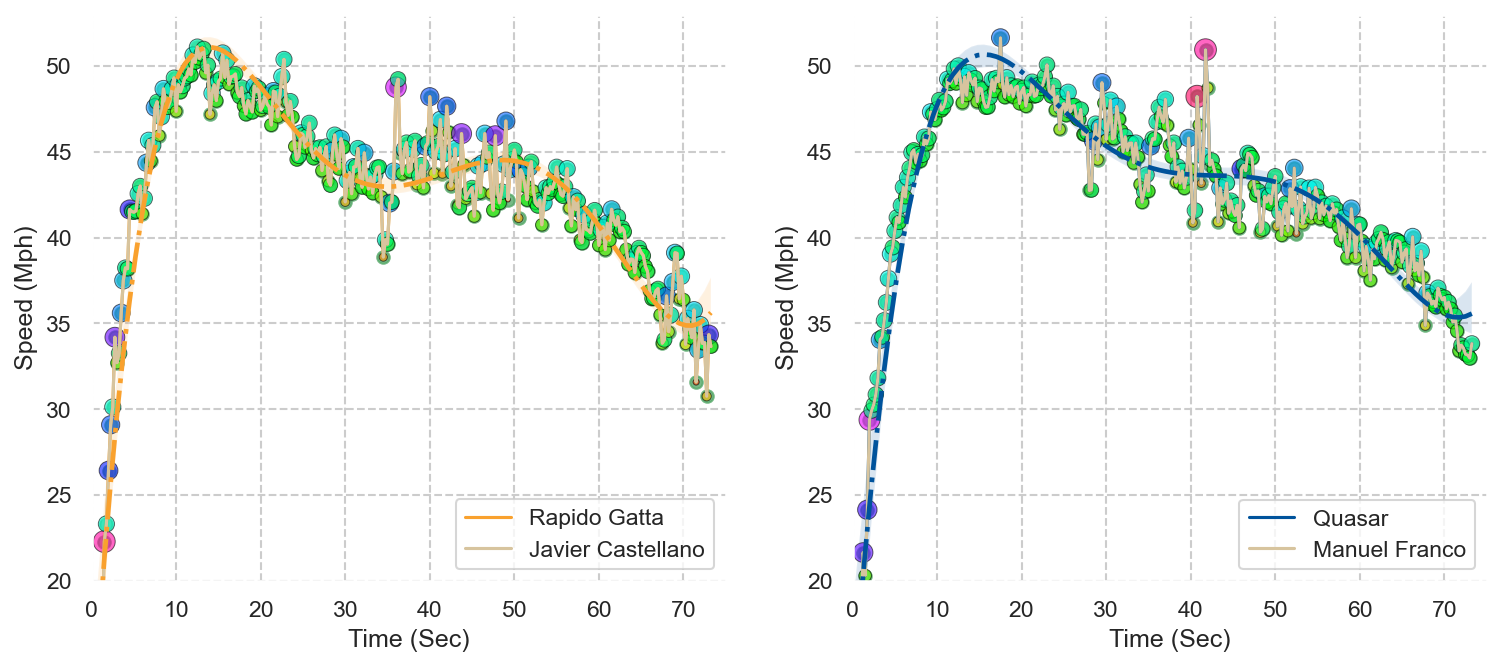

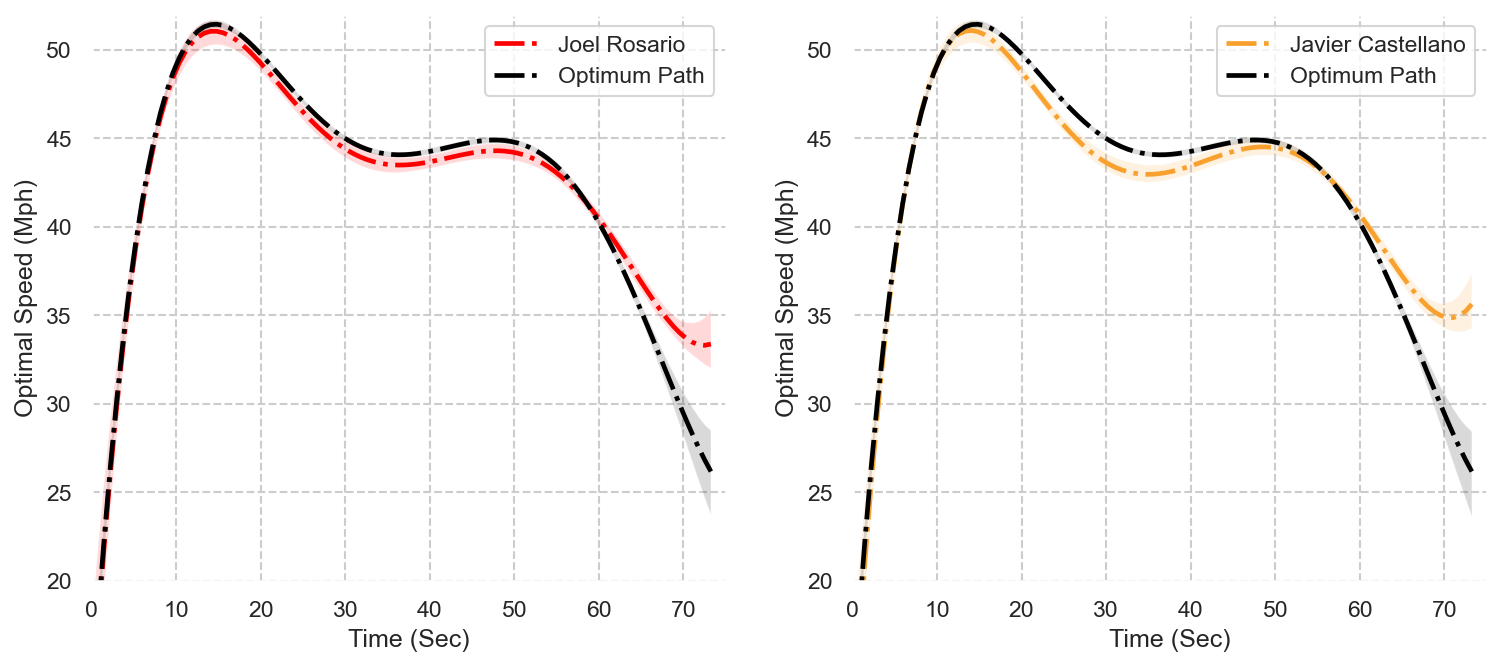

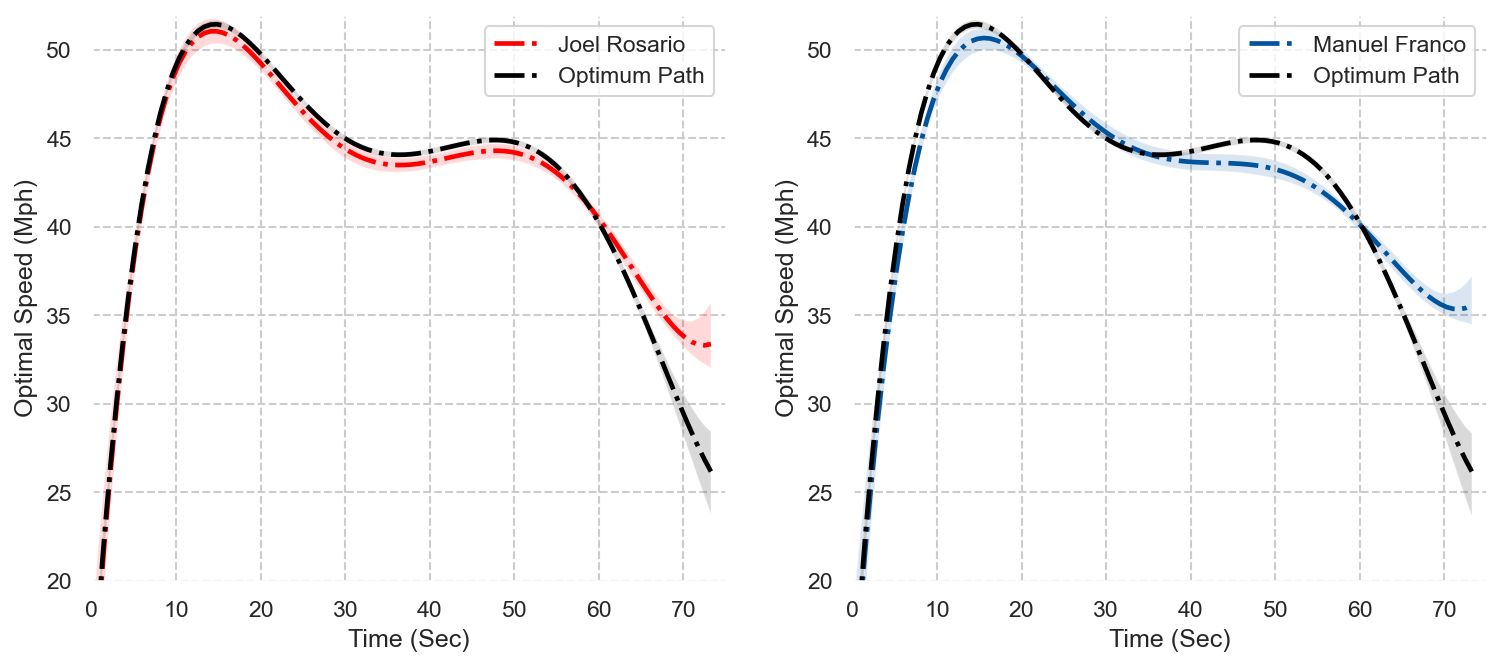

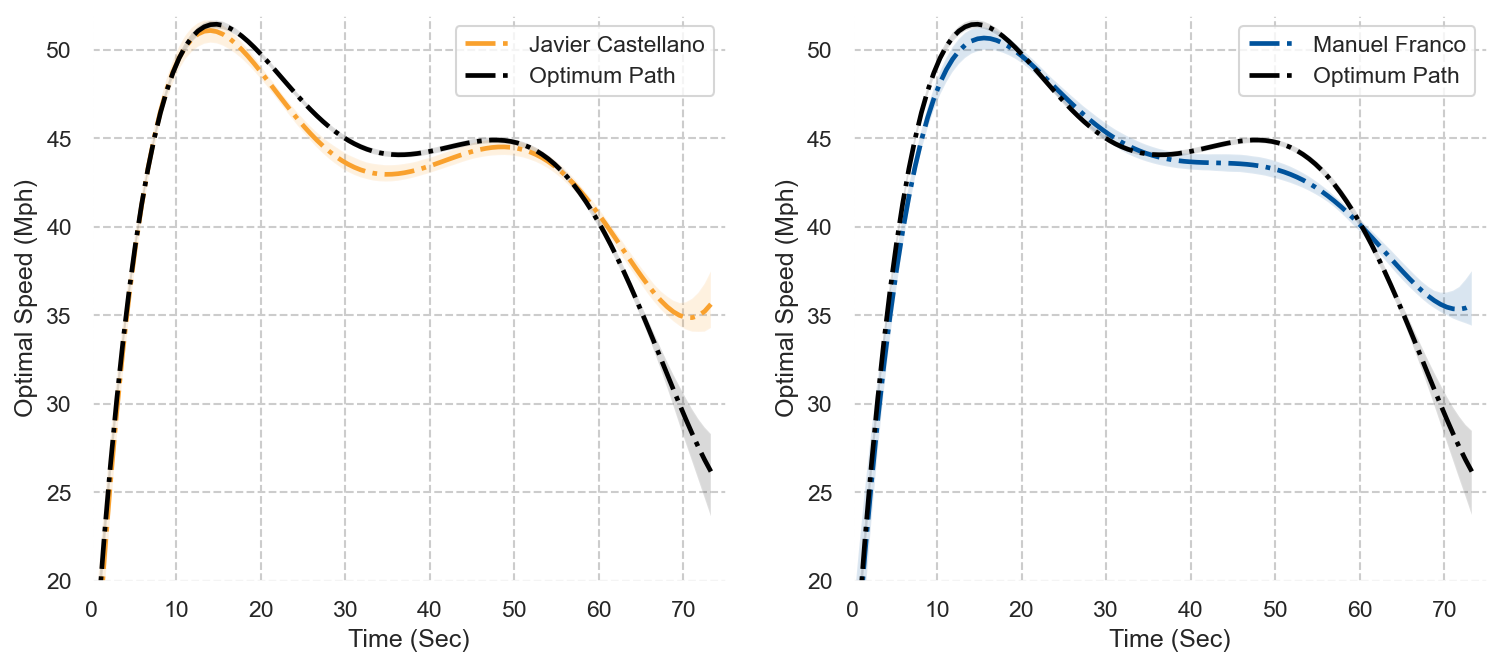

In [18]:
fig, ax = plt.subplots(1,2,figsize=(12, 5))
ax[0] = sns.lineplot(y=joel_rosario['Speed (Mph)'],x= joel_rosario['Time (Sec)'],hue=joel_rosario['horse_name'],palette=['red'],ax=ax[0])
ax[0] = sns.lineplot(y=joel_rosario['Speed (Mph)'],x= joel_rosario['Time (Sec)'],hue=joel_rosario['jockey'],palette=['#D7C49EFF'],ax=ax[0])
ax[0] = sns.regplot(y=joel_rosario['Speed (Mph)'],x= joel_rosario['Time (Sec)'], order=5,line_kws={'color':'red','linestyle':'-.'},ax=ax[0])
ax[0] = sns.scatterplot(data=joel_rosario, x= joel_rosario['Time (Sec)'], y=joel_rosario['Speed (Mph)'],hue=joel_rosario['Acceleration'],palette='hsv',alpha=0.6, ec='black', size="Acceleration", sizes=(5,120),legend=None,ax=ax[0])
ax[0].set_xlim(0, 75)
ax[0].set_ylim(20, 53)
ax[0].grid(which='major', color='#CCCCCC', linestyle='--')
ax[0].grid(which='minor', color='#CCCCCC', linestyle=':')
ax[0].legend(loc='lower right')

ax[1] = sns.lineplot(y=javier_castellano['Speed (Mph)'],x= javier_castellano['Time (Sec)'],hue=javier_castellano['horse_name'],palette=['#F9A12EFF'],ax=ax[1])
ax[1] = sns.lineplot(y=javier_castellano['Speed (Mph)'],x= javier_castellano['Time (Sec)'],hue=javier_castellano['jockey'],palette=['#D7C49EFF'],ax=ax[1])
ax[1] = sns.regplot(y=javier_castellano['Speed (Mph)'],x= javier_castellano['Time (Sec)'], order=5,line_kws={'color':'#F9A12EFF','linestyle':'-.'},ax=ax[1])
ax[1] = sns.scatterplot(data=javier_castellano, x= javier_castellano['Time (Sec)'], y=javier_castellano['Speed (Mph)'],hue=javier_castellano['Acceleration'],palette='hsv',alpha=0.6, ec='black', size="Acceleration", sizes=(5,120),legend=None,ax=ax[1])
ax[1].set_xlim(0, 75)
ax[1].set_ylim(20, 53)
ax[1].grid(which='major', color='#CCCCCC', linestyle='--')
ax[1].grid(which='minor', color='#CCCCCC', linestyle=':')
ax[1].legend(loc='lower right')
plt.savefig('Joel_Rosario_vs_Javier_Castellano.png', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1,2,figsize=(12, 5))
ax[0] = sns.lineplot(y=joel_rosario['Speed (Mph)'],x= joel_rosario['Time (Sec)'],hue=joel_rosario['horse_name'],palette=['red'],ax=ax[0])
ax[0] = sns.lineplot(y=joel_rosario['Speed (Mph)'],x= joel_rosario['Time (Sec)'],hue=joel_rosario['jockey'],palette=['#D7C49EFF'],ax=ax[0])
ax[0] = sns.regplot(y=joel_rosario['Speed (Mph)'],x= joel_rosario['Time (Sec)'], order=5,line_kws={'color':'red','linestyle':'-.'},ax=ax[0])
ax[0] = sns.scatterplot(data=joel_rosario, x= joel_rosario['Time (Sec)'], y=joel_rosario['Speed (Mph)'],hue=joel_rosario['Acceleration'],palette='hsv',alpha=0.6, ec='black', size="Acceleration", sizes=(5,120),legend=None,ax=ax[0])
ax[0].set_xlim(0, 75)
ax[0].set_ylim(20, 53)
ax[0].grid(which='major', color='#CCCCCC', linestyle='--')
ax[0].grid(which='minor', color='#CCCCCC', linestyle=':')
ax[0].legend(loc='lower right')

ax[1] = sns.lineplot(y=manuel_franco['Speed (Mph)'],x= manuel_franco['Time (Sec)'],hue=manuel_franco['horse_name'],palette=['#00539CFF'],ax=ax[1])
ax[1] = sns.lineplot(y=manuel_franco['Speed (Mph)'],x= manuel_franco['Time (Sec)'],hue=manuel_franco['jockey'],palette=['#D7C49EFF'],ax=ax[1])
ax[1] = sns.regplot(data=manuel_franco,y=manuel_franco['Speed (Mph)'],x= manuel_franco['Time (Sec)'], order=5,line_kws={'color':'#00539CFF','linestyle':'-.'},ax=ax[1])
ax[1] = sns.scatterplot(data=manuel_franco, x= manuel_franco['Time (Sec)'], y=manuel_franco['Speed (Mph)'],hue=manuel_franco['Acceleration'],palette='hsv',alpha=0.6, ec='black', size="Acceleration", sizes=(5,120),legend=None,ax=ax[1])
ax[1].set_xlim(0, 75)
ax[1].set_ylim(20, 53)
ax[1].grid(which='major', color='#CCCCCC', linestyle='--')
ax[1].grid(which='minor', color='#CCCCCC', linestyle=':')
ax[1].legend(loc='lower right')
plt.savefig('Joel_Rosario_vs_Manuel_Franco.png', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1,2,figsize=(12, 5))
fig.suptitle('')
ax[0] = sns.lineplot(y=javier_castellano['Speed (Mph)'],x= javier_castellano['Time (Sec)'],hue=javier_castellano['horse_name'],palette=['#F9A12EFF'],ax=ax[0])
ax[0] = sns.lineplot(y=javier_castellano['Speed (Mph)'],x= javier_castellano['Time (Sec)'],hue=javier_castellano['jockey'],palette=['#D7C49EFF'],ax=ax[0])
ax[0] = sns.regplot(y=javier_castellano['Speed (Mph)'],x= javier_castellano['Time (Sec)'], order=5,line_kws={'color':'#F9A12EFF','linestyle':'-.'},ax=ax[0])
ax[0] = sns.scatterplot(data=javier_castellano, x= javier_castellano['Time (Sec)'], y=javier_castellano['Speed (Mph)'],hue=javier_castellano['Acceleration'],palette='hsv',alpha=0.6, ec='black', size="Acceleration", sizes=(5,120),legend=None,ax=ax[0])
ax[0].set_xlim(0, 75)
ax[0].set_ylim(20, 53)
ax[0].grid(which='major', color='#CCCCCC', linestyle='--')
ax[0].grid(which='minor', color='#CCCCCC', linestyle=':')
ax[0].legend(loc='lower right')

ax[1] = sns.lineplot(y=manuel_franco['Speed (Mph)'],x= manuel_franco['Time (Sec)'],hue=manuel_franco['horse_name'],palette=['#00539CFF'],ax=ax[1])
ax[1] = sns.lineplot(y=manuel_franco['Speed (Mph)'],x= manuel_franco['Time (Sec)'],hue=manuel_franco['jockey'],palette=['#D7C49EFF'],ax=ax[1])
ax[1] = sns.regplot(data=manuel_franco,y=manuel_franco['Speed (Mph)'],x= manuel_franco['Time (Sec)'], order=5,line_kws={'color':'#00539CFF','linestyle':'-.'},ax=ax[1])
ax[1] = sns.scatterplot(data=manuel_franco, x= manuel_franco['Time (Sec)'], y=manuel_franco['Speed (Mph)'],hue=manuel_franco['Acceleration'],palette='hsv',alpha=0.6, ec='black', size="Acceleration", sizes=(5,120),legend=None,ax=ax[1])
ax[1].set_xlim(0, 75)
ax[1].set_ylim(20, 53)
ax[1].grid(which='major', color='#CCCCCC', linestyle='--')
ax[1].grid(which='minor', color='#CCCCCC', linestyle=':')
ax[1].legend(loc='lower right')
plt.savefig('Javier_Castellano_vs_Manuel_Franco.png', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1,2,figsize=(12, 5))
ax[0] = sns.regplot(y=joel_rosario['Speed (Mph)'],x= joel_rosario['Time (Sec)'], order=5,line_kws={'color':'red','linestyle':'-.'},ax=ax[0],scatter=False,label="Joel Rosario")
ax[0] = sns.regplot(y=race['Optimal Speed (Mph)'],x= race['Time (Sec)'], order=5,line_kws={'color':'black','linestyle':'-.'},ax=ax[0],scatter=False,label="Optimum Path")
ax[0].set_xlim(0, 75)
ax[0].set_ylim(20, 52) 
ax[0].grid(which='major', color='#CCCCCC', linestyle='--')
ax[0].grid(which='minor', color='#CCCCCC', linestyle=':')

ax[1] = sns.regplot(y=javier_castellano['Speed (Mph)'],x= javier_castellano['Time (Sec)'], order=5,line_kws={'color':'#F9A12EFF','linestyle':'-.'},ax=ax[1],scatter=False,label="Javier Castellano")
ax[1] = sns.regplot(y=race['Optimal Speed (Mph)'],x= race['Time (Sec)'], order=5,line_kws={'color':'black','linestyle':'-.'},ax=ax[1],scatter=False,label="Optimum Path")
ax[1].set_xlim(0, 75)
ax[1].set_ylim(20, 52) 
ax[1].grid(which='major', color='#CCCCCC', linestyle='--')
ax[1].grid(which='minor', color='#CCCCCC', linestyle=':')
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
plt.savefig('jr_jv_reg.png', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1,2,figsize=(12, 5))
ax[0] = sns.regplot(y=joel_rosario['Speed (Mph)'],x= joel_rosario['Time (Sec)'], order=5,line_kws={'color':'red','linestyle':'-.'},ax=ax[0],scatter=False,label="Joel Rosario")
ax[0] = sns.regplot(y=race['Optimal Speed (Mph)'],x= race['Time (Sec)'], order=5,line_kws={'color':'black','linestyle':'-.'},ax=ax[0],scatter=False,label="Optimum Path")
ax[0].set_xlim(0, 75)
ax[0].set_ylim(20, 52) 
ax[0].grid(which='major', color='#CCCCCC', linestyle='--')
ax[0].grid(which='minor', color='#CCCCCC', linestyle=':')

ax[1] = sns.regplot(y=manuel_franco['Speed (Mph)'],x= manuel_franco['Time (Sec)'], order=5,line_kws={'color':'#00539CFF','linestyle':'-.'},ax=ax[1],scatter=False,label="Manuel Franco")
ax[1] = sns.regplot(y=race['Optimal Speed (Mph)'],x= race['Time (Sec)'], order=5,line_kws={'color':'black','linestyle':'-.'},ax=ax[1],scatter=False,label="Optimum Path")
ax[1].set_xlim(0, 75)
ax[1].set_ylim(20, 52) 
ax[1].grid(which='major', color='#CCCCCC', linestyle='--')
ax[1].grid(which='minor', color='#CCCCCC', linestyle=':')
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
plt.savefig('jr_mf_reg.png', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1,2,figsize=(12, 5))
ax[0] = sns.regplot(y=javier_castellano['Speed (Mph)'],x= javier_castellano['Time (Sec)'], order=5,line_kws={'color':'#F9A12EFF','linestyle':'-.'},ax=ax[0],scatter=False,label="Javier Castellano")
ax[0] = sns.regplot(y=race['Optimal Speed (Mph)'],x= race['Time (Sec)'], order=5,line_kws={'color':'black','linestyle':'-.'},ax=ax[0],scatter=False,label="Optimum Path")
ax[0].set_xlim(0, 75)
ax[0].set_ylim(20, 52) 
ax[0].grid(which='major', color='#CCCCCC', linestyle='--')
ax[0].grid(which='minor', color='#CCCCCC', linestyle=':')


ax[1] = sns.regplot(y=manuel_franco['Speed (Mph)'],x= manuel_franco['Time (Sec)'], order=5,line_kws={'color':'#00539CFF','linestyle':'-.'},ax=ax[1],scatter=False, label="Manuel Franco")
ax[1] = sns.regplot(y=race['Optimal Speed (Mph)'],x= race['Time (Sec)'], order=5,line_kws={'color':'black','linestyle':'-.'},ax=ax[1],scatter=False,label="Optimum Path")
ax[1].set_xlim(0, 75)
ax[1].set_ylim(20, 52) 
ax[1].grid(which='major', color='#CCCCCC', linestyle='--')
ax[1].grid(which='minor', color='#CCCCCC', linestyle=':')
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
plt.savefig('jv_mf_reg.png', bbox_inches='tight')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


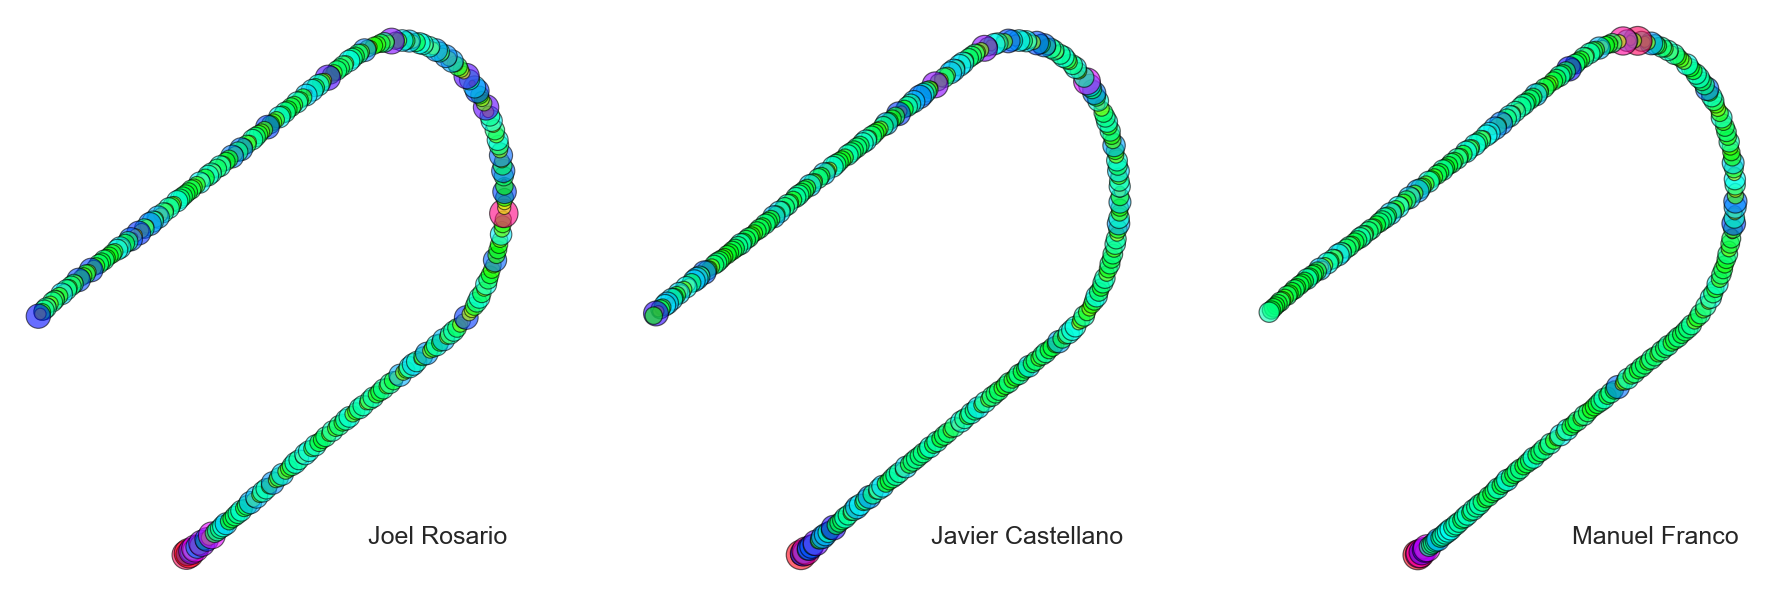

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


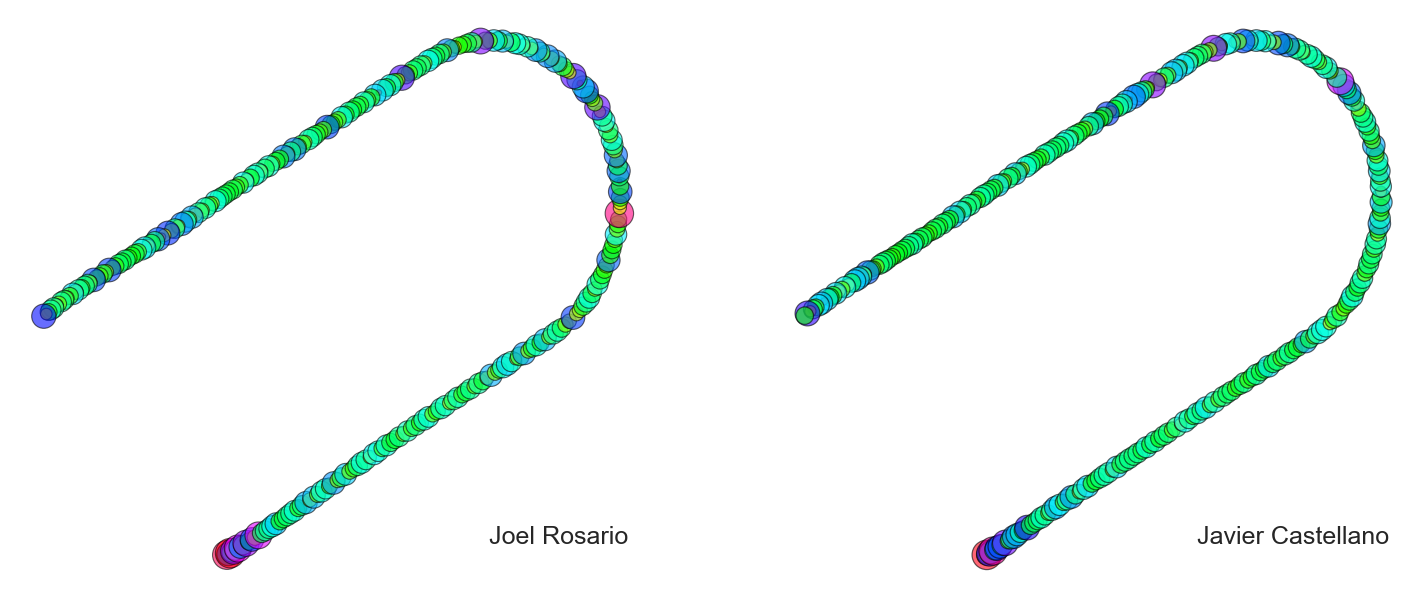

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


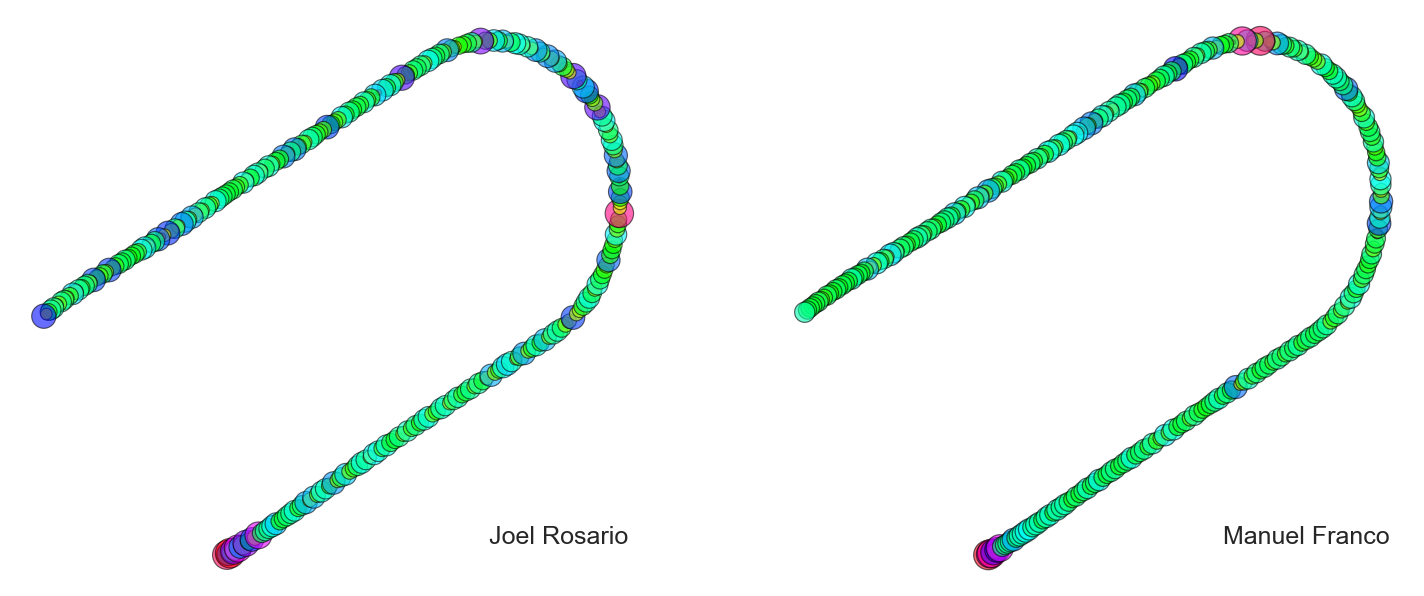

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


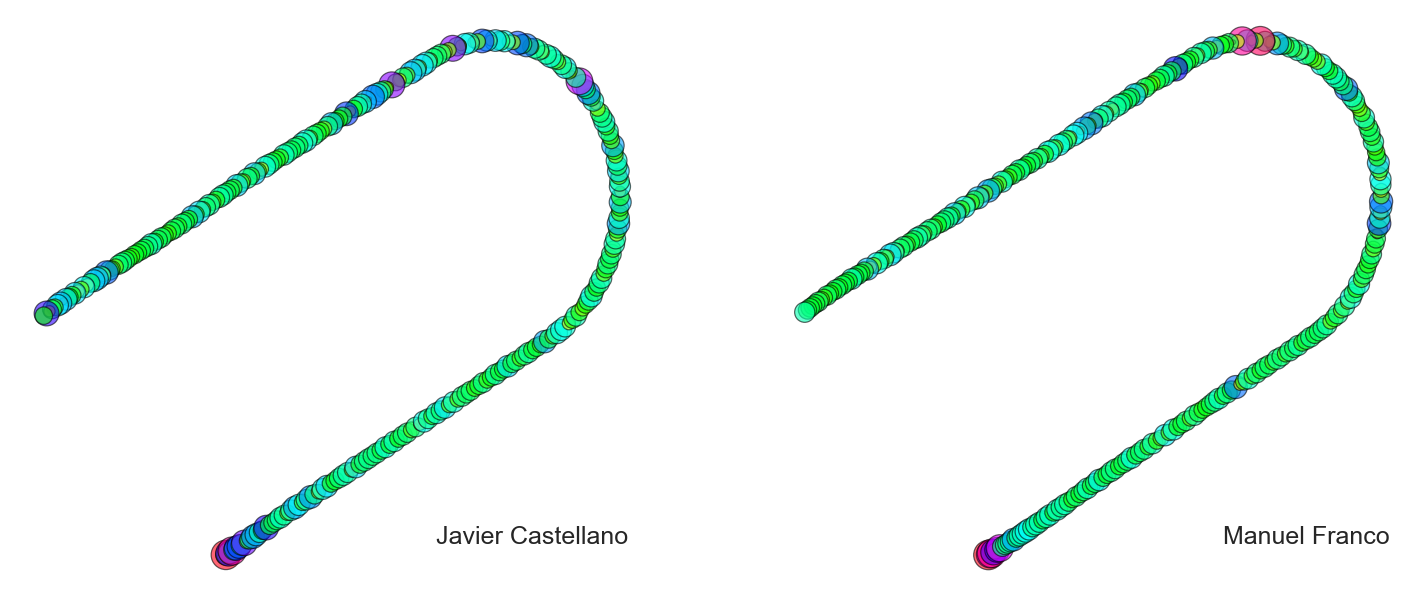

In [19]:
fig, ax = plt.subplots(1,3,figsize=(15, 5))
ax[0] = sns.scatterplot(x=joel_rosario['longitude'], y=joel_rosario['latitude'],hue=joel_rosario['Acceleration'],palette='hsv',alpha=0.6, ec='black', size=joel_rosario['Acceleration'],sizes=(5,200),legend=None,ax=ax[0])
ax[1] = sns.scatterplot(x=javier_castellano['longitude'], y=javier_castellano['latitude'],hue=javier_castellano['Acceleration'],palette='hsv',alpha=0.6, ec='black', size=javier_castellano['Acceleration'],sizes=(5,200),legend=None,ax=ax[1])
ax[2] = sns.scatterplot(x=manuel_franco['longitude'], y=manuel_franco['latitude'],hue=manuel_franco['Acceleration'],palette='hsv',alpha=0.6, ec='black', size=manuel_franco['Acceleration'],sizes=(5,200),legend=None,ax=ax[2])
ax[0].axis("off")
ax[1].axis("off")
ax[2].axis("off")
ax[0].legend(loc='lower right',title="Joel Rosario",frameon=False)
ax[1].legend(loc='lower right',title="Javier Castellano",frameon=False)
ax[2].legend(loc='lower right',title="Manuel Franco",frameon=False)
plt.savefig('joc_acc_on_track.png', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1,2,figsize=(12, 5))
ax[0] = sns.scatterplot(x=joel_rosario['longitude'], y=joel_rosario['latitude'],hue=joel_rosario['Acceleration'],palette='hsv',alpha=0.6, ec='black', size=joel_rosario['Acceleration'],sizes=(5,200),legend=None,ax=ax[0])
ax[1] = sns.scatterplot(x=javier_castellano['longitude'], y=javier_castellano['latitude'],hue=javier_castellano['Acceleration'],palette='hsv',alpha=0.6, ec='black', size=javier_castellano['Acceleration'],sizes=(5,200),legend=None,ax=ax[1])

ax[0].axis("off")
ax[1].axis("off")
ax[0].legend(loc='lower right',title="Joel Rosario",frameon=False)
ax[1].legend(loc='lower right',title="Javier Castellano",frameon=False)
plt.savefig('jr_jc_acc_track.png', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1,2,figsize=(12, 5))
ax[0] = sns.scatterplot(x=joel_rosario['longitude'], y=joel_rosario['latitude'],hue=joel_rosario['Acceleration'],palette='hsv',alpha=0.6, ec='black', size=joel_rosario['Acceleration'],sizes=(5,200),legend=None,ax=ax[0])
ax[1] = sns.scatterplot(x=manuel_franco['longitude'], y=manuel_franco['latitude'],hue=manuel_franco['Acceleration'],palette='hsv',alpha=0.6, ec='black', size=manuel_franco['Acceleration'],sizes=(5,200),legend=None,ax=ax[1])
ax[0].axis("off")
ax[1].axis("off")
ax[0].legend(loc='lower right',title="Joel Rosario",frameon=False)
ax[1].legend(loc='lower right',title="Manuel Franco",frameon=False)
plt.savefig('jr_mf_acc_track.png', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1,2,figsize=(12, 5))
ax[0] = sns.scatterplot(x=javier_castellano['longitude'], y=javier_castellano['latitude'],hue=javier_castellano['Acceleration'],palette='hsv',alpha=0.6, ec='black', size=javier_castellano['Acceleration'],sizes=(5,200),legend=None,ax=ax[0])
ax[1] = sns.scatterplot(x=manuel_franco['longitude'], y=manuel_franco['latitude'],hue=manuel_franco['Acceleration'],palette='hsv',alpha=0.6, ec='black', size=manuel_franco['Acceleration'],sizes=(5,200),legend=None,ax=ax[1])
ax[0].axis("off")
ax[1].axis("off")
ax[0].legend(loc='lower right',title="Javier Castellano",frameon=False)
ax[1].legend(loc='lower right',title="Manuel Franco",frameon=False)
plt.savefig('jc_mf_acc_track.png', bbox_inches='tight')
plt.show()

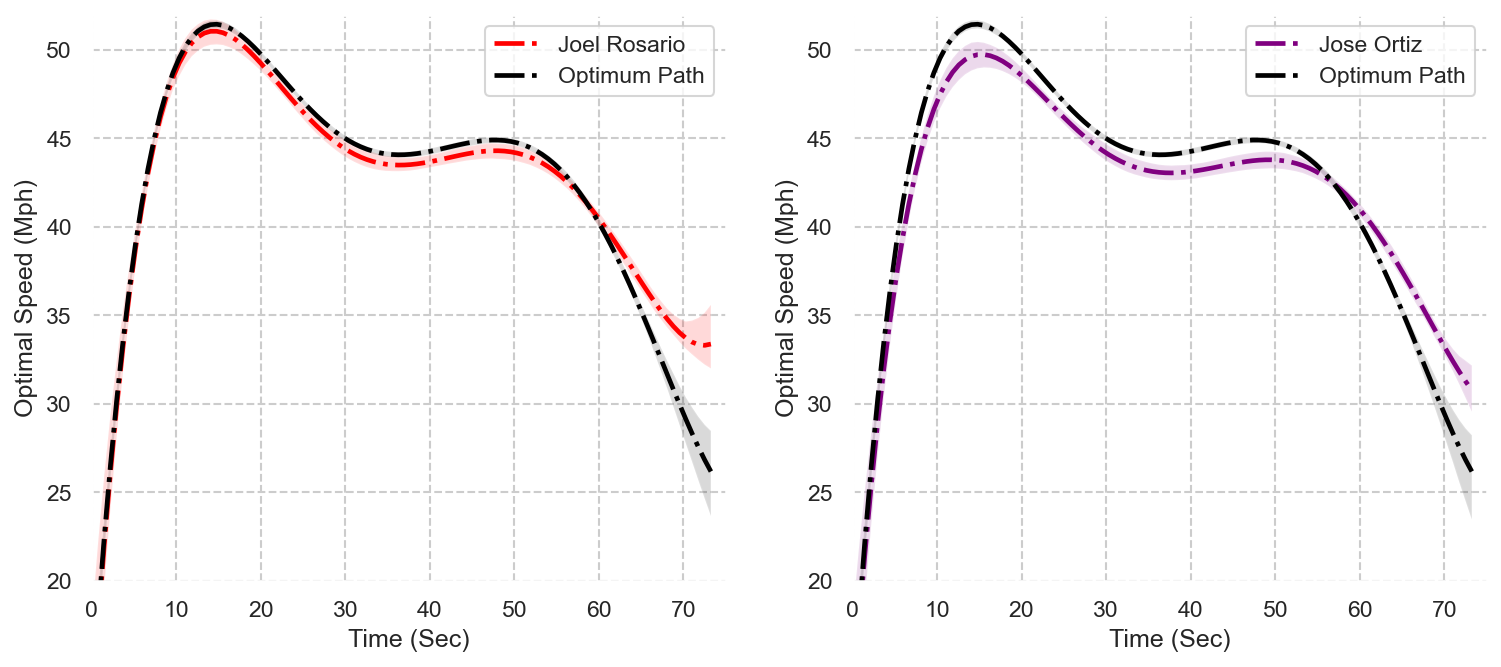

In [31]:
fig, ax = plt.subplots(1,2,figsize=(12, 5))
ax[0] = sns.regplot(y=joel_rosario['Speed (Mph)'],x= joel_rosario['Time (Sec)'], order=5,line_kws={'color':'red','linestyle':'-.'},ax=ax[0],scatter=False,label="Joel Rosario")
ax[0] = sns.regplot(y=race['Optimal Speed (Mph)'],x= race['Time (Sec)'], order=5,line_kws={'color':'black','linestyle':'-.'},ax=ax[0],scatter=False,label="Optimum Path")
ax[0].set_xlim(0, 75)
ax[0].set_ylim(20, 52) 
ax[0].grid(which='major', color='#CCCCCC', linestyle='--')
ax[0].grid(which='minor', color='#CCCCCC', linestyle=':')

ax[1] = sns.regplot(y=jose_ortiz['Speed (Mph)'],x= jose_ortiz['Time (Sec)'], order=5,line_kws={'color':'purple','linestyle':'-.'},ax=ax[1],scatter=False,label="Jose Ortiz")
ax[1] = sns.regplot(y=race['Optimal Speed (Mph)'],x= race['Time (Sec)'], order=5,line_kws={'color':'black','linestyle':'-.'},ax=ax[1],scatter=False,label="Optimum Path")
ax[1].set_xlim(0, 75)
ax[1].set_ylim(20, 52) 
ax[1].grid(which='major', color='#CCCCCC', linestyle='--')
ax[1].grid(which='minor', color='#CCCCCC', linestyle=':')
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
plt.savefig('jr_jo_reg.png', bbox_inches='tight')
plt.show()

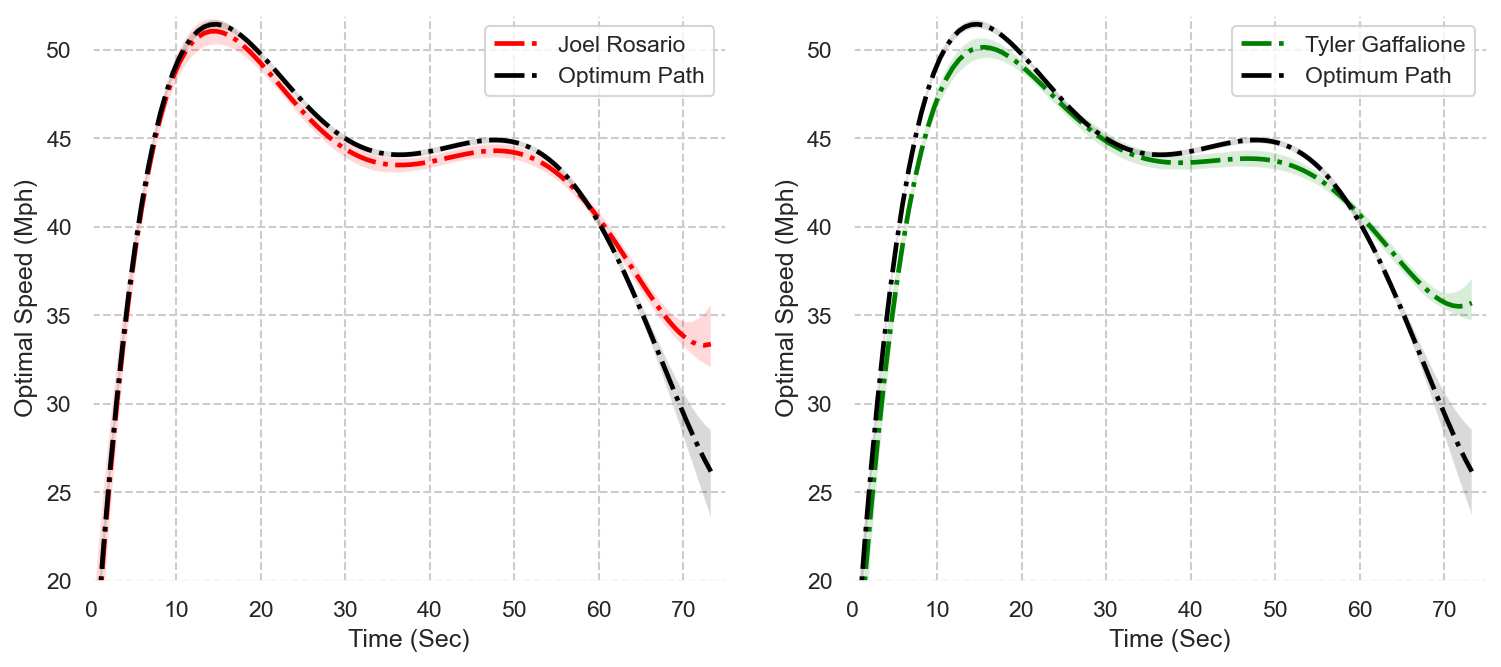

In [21]:
fig, ax = plt.subplots(1,2,figsize=(12, 5))
ax[0] = sns.regplot(y=joel_rosario['Speed (Mph)'],x= joel_rosario['Time (Sec)'], order=5,line_kws={'color':'red','linestyle':'-.'},ax=ax[0],scatter=False,label="Joel Rosario")
ax[0] = sns.regplot(y=race['Optimal Speed (Mph)'],x= race['Time (Sec)'], order=5,line_kws={'color':'black','linestyle':'-.'},ax=ax[0],scatter=False,label="Optimum Path")
ax[0].set_xlim(0, 75)
ax[0].set_ylim(20, 52) 
ax[0].grid(which='major', color='#CCCCCC', linestyle='--')
ax[0].grid(which='minor', color='#CCCCCC', linestyle=':')

ax[1] = sns.regplot(y=tyler_gaffalione['Speed (Mph)'],x= tyler_gaffalione['Time (Sec)'], order=5,line_kws={'color':'green','linestyle':'-.'},ax=ax[1],scatter=False,label="Tyler Gaffalione")
ax[1] = sns.regplot(y=race['Optimal Speed (Mph)'],x= race['Time (Sec)'], order=5,line_kws={'color':'black','linestyle':'-.'},ax=ax[1],scatter=False,label="Optimum Path")
ax[1].set_xlim(0, 75)
ax[1].set_ylim(20, 52) 
ax[1].grid(which='major', color='#CCCCCC', linestyle='--')
ax[1].grid(which='minor', color='#CCCCCC', linestyle=':')
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
# plt.savefig('jr_jv_reg.png', bbox_inches='tight')
plt.show()

In [22]:
from sklearn import metrics
from termcolor import colored

joel_rosario_actual_speed = joel_rosario['Speed (Mph)'].tolist()
joel_rosario_against_optimum_speed = joel_rosario['Optimal Speed (Mph)'].tolist()

javier_castellano_actual_speed = javier_castellano['Speed (Mph)'].tolist()
javier_castellano_against_optimum_speed = javier_castellano['Optimal Speed (Mph)'].tolist()

manuel_franco_actual_speed = manuel_franco['Speed (Mph)'].tolist()
manuel_franco_against_optimum_speed = manuel_franco['Optimal Speed (Mph)'].tolist()

tyler_gaffalione_actual_speed = tyler_gaffalione['Speed (Mph)'].tolist()
tyler_gaffalione_against_optimum_speed = tyler_gaffalione['Optimal Speed (Mph)'].tolist()

dylan_davis_actual_speed  = dylan_davis['Speed (Mph)'].tolist()
dylan_davis_against_optimum_speed = dylan_davis['Optimal Speed (Mph)'].tolist()

jose_ortiz_actual_speed  = jose_ortiz['Speed (Mph)'].tolist()
jose_ortiz_against_optimum_speed = jose_ortiz['Optimal Speed (Mph)'].tolist()

junior_alvarado_actual_speed  = junior_alvarado['Speed (Mph)'].tolist()
junior_alvarado_against_optimum_speed = junior_alvarado['Optimal Speed (Mph)'].tolist()



def print_evaluate(actual, optimum):  
    # MSE, RMSE, & RMSLE
    mse = metrics.mean_squared_error(actual, optimum)
    rmse = np.sqrt(metrics.mean_squared_error(actual, optimum))
    rmsle = np.log(np.sqrt(metrics.mean_squared_error(actual,optimum)))
    
    # MAE & MAPE
    mae = metrics.mean_absolute_error(actual, optimum)
    mape = metrics.mean_absolute_percentage_error(actual, optimum)
    
    # R2
    r2_square = metrics.r2_score(actual, optimum)
    
    print(colored("MSE","magenta",attrs=["bold"]),colored("- - - - - - - - - - - --> "),colored("{:.4f}".format(mse),"blue",attrs=['bold']))
    print(colored("RMSE","magenta",attrs=["bold"]),colored("-- - - - - - - - - - --> "),colored("{:.5f}".format(rmse),"blue",attrs=['bold']))
    print(colored("RMSLE","magenta",attrs=["bold"]),colored("- - - - - - - - - - --> "),colored("{:.5f}".format(rmsle),"blue",attrs=['bold']))
    print(colored("MAE","yellow",attrs=["bold"]),colored("- - - - - - - - - - - --> "),colored("{:.5f}".format(mae),"blue",attrs=['bold']))
    print(colored("MAPE","yellow",attrs=["bold"]),colored("-- - - - - - - - - - --> "),colored("{:.5f}".format(mape),"blue",attrs=['bold']))
    print(colored("R Squared","green",attrs=["bold"]),colored("- - - - - - - - --> "),colored("{:.4f}".format(r2_square * 100),"blue",attrs=['bold']),colored("%",attrs=["bold"]))
    print(colored(21 *'*=',attrs=["bold"]),'\n')


print(colored(43 *'#',"cyan",attrs=["bold"]))
print(1*' ',colored("Optimum Path Evaluation Metrics Summary",attrs=["bold"]))
print(colored(43 *'#',"cyan",attrs=["bold"]))

print(colored(21 *'*=',attrs=["bold"]))
print(colored("✱",attrs=["bold"]),colored('Ranked',"red",attrs=["bold"]),colored("1  ",attrs=["bold"]),colored("✱",attrs=["bold"]),colored('Joel Rosario',"cyan",attrs=["bold"]))   
joel = print_evaluate(joel_rosario_actual_speed,joel_rosario_against_optimum_speed)

print(colored(21 *'*=',attrs=["bold"]))
print(colored("✱",attrs=["bold"]),colored('Ranked',"red",attrs=["bold"]),colored("2  ",attrs=["bold"]),colored("✱",attrs=["bold"]),colored('Javier Castellano',"cyan",attrs=["bold"]))    
javier = print_evaluate(javier_castellano_actual_speed,javier_castellano_against_optimum_speed)

print(colored(21 *'*=',attrs=["bold"]))
print(colored("✱",attrs=["bold"]),colored('Ranked',"red",attrs=["bold"]),colored("3  ",attrs=["bold"]),colored("✱",attrs=["bold"]),colored('Manuel Franco',"cyan",attrs=["bold"]))    
manuel = print_evaluate(manuel_franco_actual_speed,manuel_franco_against_optimum_speed)

print(colored(21 *'*=',attrs=["bold"]))
print(colored("✱",attrs=["bold"]),colored('Ranked',"red",attrs=["bold"]),colored("4  ",attrs=["bold"]),colored("✱",attrs=["bold"]),colored('Tyler Gaffalione',"cyan",attrs=["bold"]))  
tyler = print_evaluate(tyler_gaffalione_actual_speed,tyler_gaffalione_against_optimum_speed)

print(colored(21 *'*=',attrs=["bold"]))
print(colored("✱",attrs=["bold"]),colored('Ranked',"red",attrs=["bold"]),colored("5  ",attrs=["bold"]),colored("✱",attrs=["bold"]),colored('Dylan Davis',"cyan",attrs=["bold"]))  
dylan = print_evaluate(dylan_davis_actual_speed,dylan_davis_against_optimum_speed)

print(colored(21 *'*=',attrs=["bold"]))
print(colored("✱",attrs=["bold"]),colored('Ranked',"red",attrs=["bold"]),colored("6  ",attrs=["bold"]),colored("✱",attrs=["bold"]),colored('Jose Ortiz',"cyan",attrs=["bold"]))  
jose_ortiz_ = print_evaluate(jose_ortiz_actual_speed,jose_ortiz_against_optimum_speed)

print(colored(21 *'*=',attrs=["bold"]))
print(colored("✱",attrs=["bold"]),colored('Ranked',"red",attrs=["bold"]),colored("7  ",attrs=["bold"]),colored("✱",attrs=["bold"]),colored('Junior Alvarado',"cyan",attrs=["bold"]))  
junior_alvarado_ = print_evaluate(junior_alvarado_actual_speed,junior_alvarado_against_optimum_speed)


###########################################
  Optimum Path Evaluation Metrics Summary
###########################################
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
✱ Ranked 1   ✱ Joel Rosario
MSE - - - - - - - - - - - -->  13.3844
RMSE -- - - - - - - - - - -->  3.65847
RMSLE - - - - - - - - - - -->  1.29704
MAE - - - - - - - - - - - -->  1.76920
MAPE -- - - - - - - - - - -->  0.04838
R Squared - - - - - - - - -->  71.9535 %
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*= 

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
✱ Ranked 2   ✱ Javier Castellano
MSE - - - - - - - - - - - -->  14.1072
RMSE -- - - - - - - - - - -->  3.75595
RMSLE - - - - - - - - - - -->  1.32334
MAE - - - - - - - - - - - -->  1.90887
MAPE -- - - - - - - - - - -->  0.05117
R Squared - - - - - - - - -->  69.5854 %
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*= 

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
✱ Ranked 3   ✱ Manuel Franco
MSE - - - - - - - - - - - -->  15.2457
RMSE -- - - - - - - - - - -->  3.90457
RMSLE - - -

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F8412510%2Feda78a7241a08aff64f3bc9b521d7c51%2FFinal_Sar_Summary.png?generation=1666467906484458&alt=media)

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F8412510%2F9bbf5bab0118a4ef7eb2cdc58dea3b4d%2FEvalution.png?generation=1667501332826574&alt=media)

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F8412510%2F1964d5604572d85faaaae124899d70d1%2Ffinal_all.gif?generation=1667443953079954&alt=media)

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F8412510%2F8aba1981983c84423c7579bcb340233e%2FSpeed-time-curve.jpeg?generation=1665796320262949&alt=media)

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F8412510%2F110b848c959f5fb26f3b8f44a610760b%2Fjoel_vs_jaiver_vs_manuel.png?generation=1667445005224393&alt=media)

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F8412510%2F7999f2c8e93266b676ea248efaf218c0%2Foptimum_six_on_dirt_sar.png?generation=1667448393754638&alt=media)

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F8412510%2F33fd50c741a6e5bac4dbebd80676518d%2Foptimum_six_on_dirt_sar_mix_all.png?generation=1667445015627506&alt=media)

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F8412510%2Fd88278d7f26f6a25682f0b7381243a34%2Fjoc_with_optimum_reg.png?generation=1667501698321902&alt=media)

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F8412510%2Fe4464de08d7f44904e28dca61f7ae604%2Fjoc_acc_on_track.png?generation=1667447093080173&alt=media)


![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F8412510%2F642a2439a9f259ee7acf2f1b59c73f3d%2Ffinal_joel_jaiver.gif?generation=1667443978136544&alt=media)

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F8412510%2Fc4294cbe31ac1c36f261b5eb6f5f23b4%2FJoel_Rosario_vs_Javier_Castellano.png?generation=1667447340748107&alt=media)

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F8412510%2Fb21438c6859fd976aa995e18ca60e4d2%2Fjr_jv_reg.png?generation=1667501714088275&alt=media)


![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F8412510%2Fd1cc7e1770fb1894ab886e3c5c9b09f9%2Fjr_jc_acc_track.png?generation=1667450486360176&alt=media)


![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F8412510%2F897efef643a177be44fe54a8d0010e06%2Ffinal_joel_manuel.gif?generation=1667443987547595&alt=media)

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F8412510%2F65c443c6eba68020eba009e7b5b214d1%2FJoel_Rosario_vs_Manuel_Franco.png?generation=1667449364501438&alt=media)

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F8412510%2Fbbd65ba6a44ef9998eabab4d316c4bf4%2Fjr_mf_reg.png?generation=1667501729513474&alt=media)

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F8412510%2F3ee3fbc9b5179e8fed41ecd661326971%2Fjr_mf_acc_track.png?generation=1667450502037929&alt=media)


![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F8412510%2F3958b1fbe26a3f052b0c4b75516816cc%2Ffinal_jaiver_manuel.gif?generation=1667443961081945&alt=media)

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F8412510%2F65b40e51c32a1c9a431f76999d692c08%2FJavier_Castellano_vs_Manuel_Franco.png?generation=1667449753750217&alt=media)

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F8412510%2F49817c57d307987ec167506936827706%2Fjv_mf_reg.png?generation=1667501746569029&alt=media)

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F8412510%2Fd29c5dd844c20b3997977c27aef147df%2Fjc_mf_acc_track.png?generation=1667450471187808&alt=media)



![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F8412510%2Fb8a14795ff1895955f88a9af04eb9446%2Ffinal_joel.gif?generation=1667443996774192&alt=media)

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F8412510%2F0069b0ffd2401d1bfddfdbadafcc88b2%2Ffinal_jaiver.gif?generation=1667443968558545&alt=media)

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F8412510%2F9afef646892cadf4c8e80ea3a8639610%2Ffinal_manuel.gif?generation=1667444005242193&alt=media)


![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F8412510%2F54fcf59c67fd359f2e3428d572a1cbf5%2Fnew_sar_joc_col.gif?generation=1667407271083009&alt=media)



In [ ]:
import numpy as np
import matplotlib.colors
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML

In [ ]:
def show_plain(df):
    %matplotlib qt

    fig, ax = plt.subplots(figsize=(10, 5))

    sns.scatterplot(x=race['average_longi'], y=race['average_lat'],hue=race['optimum_jockey'],palette=['white'],ec='white',size=race['Optimal Acceleration'],sizes=(20,800),legend=None)
    plt.plot(race['average_longi'], race['average_lat'], c= "black",linewidth=4, linestyle='--', label="Optimum Path")
    plt.legend(loc="upper left")


    x = df['longitude'].to_numpy()
    y = df['latitude'].to_numpy()
    z = df['Acceleration'].to_numpy()


    sc_1 = ax.scatter([], [])
    line, = ax.plot([], [], color="red", zorder=4,label='Joel Rosario',linewidth = 3,linestyle='--')
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","white","white","white","white","white","white","white","white","white","white","white"])


    def animate(i):
        ## plot scatter point
        sc_1 = sns.scatterplot(x=x[:i], y=y[:i],hue=z[:i],size=z[:i],palette=cmap,ec='white',sizes=(10,400),legend='brief')

        ## plot line
        line.set_data(x[:i*5], y[:i*5])
        ax.legend(handles=[line],loc='lower right')

        return sc_1, line

    ani = animation.FuncAnimation(fig=fig,func=animate, interval=100, blit=True, save_count=1500)
    plt.axis("off")
    return ani
    

In [ ]:
ani_race = show_plain(joel_rosario)

In [ ]:
def show_plain_two(df1,df2):
    %matplotlib qt

    fig, ax = plt.subplots(figsize=(10, 5))

    sns.scatterplot(x=race['average_longi'], y=race['average_lat'],hue=race['optimum_jockey'],palette=['white'],ec='white',size=race['Optimal Acceleration'],sizes=(20,800),legend=None)
    plt.plot(race['average_longi'], race['average_lat'], c= "black",linewidth=4, linestyle='--', label="Optimum Path")
    plt.legend(loc="upper left")


    x = df1['longitude'].to_numpy()
    y = df1['latitude'].to_numpy()
    z = df1['Acceleration'].to_numpy()
    
    x2 = df2['longitude'].to_numpy()
    y2 = df2['latitude'].to_numpy()
    z2 = df2['Acceleration'].to_numpy()


    sc_1 = ax.scatter([], [])
    sc_2 = ax.scatter([], [])
    line, = ax.plot([], [], color="#F9A12EFF", zorder=4,label='Javier Castellano',linewidth = 3,linestyle='--')
    line2, = ax.plot([], [], color="#00539CFF", zorder=4,label='Manuel Franco',linewidth = 3,linestyle='--')
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","white","white","white","white","white","white","white","white","white","white","white"])


    def animate(i):
        ## plot scatter point
        sc_1 = sns.scatterplot(x=x[:i], y=y[:i],hue=z[:i],size=z[:i],palette=cmap,ec='white',sizes=(10,400),legend='brief')
        sc_2 = sns.scatterplot(x=x2[:i], y=y2[:i],hue=z[:i],size=z2[:i],palette=cmap,ec='white',sizes=(10,400),legend='brief')

        ## plot line
        line.set_data(x[:i*5], y[:i*5])
        line2.set_data(x2[:i*5], y2[:i*5])
        
        ax.legend(handles=[line,line2],loc='lower right')

        return sc_1, sc_2, line, line2

    ani = animation.FuncAnimation(fig=fig,func=animate, interval=100, blit=True, save_count=1500)
    plt.axis("off")
    return ani
    

In [ ]:
ani_race = show_plain_two(javier_castellano,manuel_franco)

In [ ]:
def show_plain_three(df1,df2,df3):
    %matplotlib qt

    fig, ax = plt.subplots(figsize=(10, 5))

    sns.scatterplot(x=race['average_longi'], y=race['average_lat'],hue=race['optimum_jockey'],palette=['white'],ec='white',size=race['Optimal Acceleration'],sizes=(20,800),legend=None)
    plt.plot(race['average_longi'], race['average_lat'], c= "black",linewidth=4, linestyle='--', label="Optimum Path")
    plt.legend(loc="upper left")


    x = df1['longitude'].to_numpy()
    y = df1['latitude'].to_numpy()
    z = df1['Acceleration'].to_numpy()
    
    x2 = df2['longitude'].to_numpy()
    y2 = df2['latitude'].to_numpy()
    z2 = df2['Acceleration'].to_numpy()
    
    x3 = df3['longitude'].to_numpy()
    y3 = df3['latitude'].to_numpy()
    z3 = df3['Acceleration'].to_numpy()


    sc_1 = ax.scatter([], [])
    sc_2 = ax.scatter([], [])
    sc_3 = ax.scatter([], [])
    line, = ax.plot([], [], color="red", zorder=4,label='Joel Rosario',linewidth = 3,linestyle='--')
    line2, = ax.plot([], [], color="#F9A12EFF", zorder=4,label='Javier Castellano',linewidth = 3,linestyle='--')
    line3, = ax.plot([], [], color="#00539CFF", zorder=4,label='Manuel Franco',linewidth = 3,linestyle='--')
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","white","white","white","white","white","white","white","white","white","white","white"])


    def animate(i):
        ## plot scatter point
        sc_1 = sns.scatterplot(x=x[:i], y=y[:i],hue=z[:i],size=z[:i],palette=cmap,ec='white',sizes=(10,400),legend='brief')
        sc_2 = sns.scatterplot(x=x2[:i], y=y2[:i],hue=z2[:i],size=z2[:i],palette=cmap,ec='white',sizes=(10,400),legend='brief')
        sc_3 = sns.scatterplot(x=x3[:i], y=y3[:i],hue=z3[:i],size=z3[:i],palette=cmap,ec='white',sizes=(10,400),legend='brief')

        ## plot line
        line.set_data(x[:i*5], y[:i*5])
        line2.set_data(x2[:i*5], y2[:i*5])
        line3.set_data(x3[:i*5], y3[:i*5])
          
        ax.legend(handles=[line,line2,line3],loc='lower right')
        
        return sc_1, sc_2, sc_3, line, line2, line3

    ani = animation.FuncAnimation(fig=fig,func=animate, interval=1, blit=True,frames=len(x)//5,save_count=150)
    plt.axis("off")
    return ani
    

In [ ]:
def show_race(df):
    %matplotlib qt
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.scatterplot(x=race['average_longi'], y=race['average_lat'],ec='k',size=race['Optimal Acceleration'],sizes=(5,200),legend=None)
    plt.plot(race['average_longi'], race['average_lat'], c= "black",linewidth=2, linestyle='--', label="Optimum Path")
    x = df['longitude'].to_numpy()
    y = df['latitude'].to_numpy()
    z = df['Acceleration'].to_numpy()
    
    sc_1 = ax.scatter([], [])
    line, = ax.plot([], [], color="red", zorder=4)


    def animate(i):
        ## plot scatter point
        sc_1 = sns.scatterplot(x=x[:i], y=y[:i],hue=z[:i],size=z[:i],palette='hsv',sizes=(5,200),legend=None)

        ## plot line
        line.set_data(x[:i], y[:i])

        return sc_1, line
    
    ani = animation.FuncAnimation(fig=fig,func=animate, interval=100, blit=True, save_count=1500)
    plt.axis("off")
    return ani

In [ ]:
ani_race = show_race(joel_rosario)

In [ ]:
def show_race_2(df,df2):
    %matplotlib qt
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.scatterplot(x=race['average_longi'], y=race['average_lat'],ec='k',size=race['Optimal Acceleration'],sizes=(5,200),legend=None)
    plt.plot(race['average_longi'], race['average_lat'], c= "black",linewidth=2, linestyle='--', label="Optimum Path")
    x = df['longitude'].to_numpy()
    y = df['latitude'].to_numpy()
    z = df['Acceleration'].to_numpy()
    
    x2 = df2['longitude'].to_numpy()
    y2 = df2['latitude'].to_numpy()
    z2 = df2['Acceleration'].to_numpy()
    
    sc_1 = ax.scatter([], [])
    sc_2 = ax.scatter([], [])
    line, = ax.plot([], [], color="red", zorder=4)
    line2, = ax.plot([], [], color="#F9A12EFF", zorder=4)


    def animate(i):
        ## plot scatter point
        sc_1 = sns.scatterplot(x=x[:i], y=y[:i],hue=z[:i],size=z[:i],palette='hsv',sizes=(5,200),legend=None)
        sc_2 = sns.scatterplot(x=x2[:i], y=y2[:i],hue=z2[:i],size=z2[:i],palette='hsv',sizes=(5,200),legend=None)

        ## plot line
        line.set_data(x[:i], y[:i])
        line2.set_data(x2[:i], y2[:i])

        return sc_1, sc_2, line, line2
    
    ani = animation.FuncAnimation(fig=fig,func=animate, interval=100, blit=True, save_count=1500)
    plt.axis("off")
    return ani

In [ ]:
ani_race = show_race_2(joel_rosario,javier_castellano)